In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import plotly
%matplotlib inline
import statsmodels.api as sm
import pylab
%matplotlib inline

In [2]:
delimiter = ','
max_columns = max(open('all.csv', 'r'), key = lambda x: x.count(delimiter)).count(delimiter)
y=pd.read_csv('all.csv', header = None, skiprows = 0, names = list(range(0,max_columns)))
y.columns=y.iloc[0]
y=y[1:]
y

,Customer,POS NO,PO NO,Standard,Destination,POS Receive Date,POS Delivery Date,Model/Type,Description,XXS,XS (48),XS/S,S(50),M(52),L(54),XL(56),XXL,3XL,4XL,S/M,L/XL,Other,NaN,NaN
1,A.M.R INDUSTRY,62,SK2016/002,ECE,THAILAND,"Wednesday, 30 March 2016",08 April 2016,VANDAL,SOLID WHITE,NaN,NaN,NaN,6,8,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A.M.R INDUSTRY,35,SK2016/001.1,ECE,THAILAND,"Friday, 04 March 2016",ASAP,APEX,ROLLING THUNDER,NaN,NaN,NaN,1,3,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
3,A.M.R INDUSTRY,35,SK2016/001.1,ECE,THAILAND,"Friday, 04 March 2016",ASAP,APEX,SAM,NaN,NaN,NaN,1,3,2,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN
4,A.M.R INDUSTRY,35,SK2016/001.1,ECE,THAILAND,"Friday, 04 March 2016",ASAP,HALO,DRIFT YELLOW,NaN,NaN,NaN,2,3,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,A.M.R INDUSTRY,35,SK2016/001.1,ECE,THAILAND,"Friday, 04 March 2016",ASAP,HALO,DRIFT RED,NaN,NaN,NaN,2,3,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,WINNER-MOTORS,039,01/2018 REV 02,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,SPEEDSTAR VISOR CLEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN
10222,WINNER-MOTORS,039,01/2018 REV 02,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,STELLAR VISOR CLEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN
10223,WINNER-MOTORS,039,01/2018 REV 02,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,STELLAR VISOR CLEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN
10224,WINNER-MOTORS,039,01/2018 REV 02,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,SPEEDSTAR VISOR CLEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN


In [3]:
y.columns

Index([         'Customer',            'POS NO',             'PO NO',
                'Standard',       'Destination',  'POS Receive Date',
       'POS Delivery Date',        'Model/Type',       'Description',
                     'XXS',           'XS (48)',              'XS/S',
                   'S(50)',             'M(52)',             'L(54)',
                  'XL(56)',               'XXL',               '3XL',
                     '4XL',               'S/M',              'L/XL',
                   'Other',                 nan,                 nan],
      dtype='object', name=0)

In [4]:
y.dropna(how='all',inplace=True)
y.dropna(how='all', axis=1,inplace=True)
y = y.reset_index(drop=True)
y.drop(['POS NO', 'PO NO', 'Description'], axis=1,inplace=True)

In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10225 entries, 0 to 10224
Data columns (total 19 columns):
Customer             10225 non-null object
Standard             10096 non-null object
Destination          10225 non-null object
POS Receive Date     10225 non-null object
POS Delivery Date    10224 non-null object
Model/Type           10215 non-null object
XXS                  6 non-null object
XS (48)              1966 non-null object
XS/S                 2 non-null object
S(50)                3767 non-null object
M(52)                5493 non-null object
L(54)                6017 non-null object
XL(56)               4336 non-null object
XXL                  2477 non-null object
3XL                  86 non-null object
4XL                  13 non-null object
S/M                  254 non-null object
L/XL                 264 non-null object
Other                2965 non-null object
dtypes: object(19)
memory usage: 1.5+ MB


In [6]:
y[['XXS','XS (48)','XS/S','S(50)','M(52)','L(54)','XL(56)','XXL','3XL','4XL','S/M','L/XL','Other']]=y[['XXS','XS (48)','XS/S','S(50)','M(52)','L(54)','XL(56)','XXL','3XL','4XL','S/M','L/XL','Other']].fillna(0)

In [7]:
y

,Customer,Standard,Destination,POS Receive Date,POS Delivery Date,Model/Type,XXS,XS (48),XS/S,S(50),M(52),L(54),XL(56),XXL,3XL,4XL,S/M,L/XL,Other
0,A.M.R INDUSTRY,ECE,THAILAND,"Wednesday, 30 March 2016",08 April 2016,VANDAL,0,0,0,6,8,4,0,0,0,0,0,0,0
1,A.M.R INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,APEX,0,0,0,1,3,2,1,1,1,0,0,0,0
2,A.M.R INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,APEX,0,0,0,1,3,2,1,1,1,0,0,0,0
3,A.M.R INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,HALO,0,0,0,2,3,2,1,1,0,0,0,0,0
4,A.M.R INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,HALO,0,0,0,2,3,2,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20
10221,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20
10222,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20
10223,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,30


In [8]:
y['XXS'] = pd.to_numeric(y['XXS'])
y['XS (48)'] = pd.to_numeric(y['XS (48)'])
y['XS/S'] = pd.to_numeric(y['XS/S'])
y['XXS'] = pd.to_numeric(y['XXS'])
y['S(50)'] = pd.to_numeric(y['S(50)'])
y['M(52)'] = pd.to_numeric(y['M(52)'])
y['L(54)'] = pd.to_numeric(y['L(54)'])
y['XL(56)'] = pd.to_numeric(y['XL(56)'])
y['XXL'] = pd.to_numeric(y['XXL'])
y['3XL'] = pd.to_numeric(y['3XL'])
y['4XL'] = pd.to_numeric(y['4XL'])
y['S/M'] = pd.to_numeric(y['S/M'])
y['L/XL'] = pd.to_numeric(y['L/XL'])
y['Other'] = pd.to_numeric(y['Other'])
y['Total Helmet']=y['XXS']+y['XS (48)']+y['XS/S']+y['S(50)']+y['M(52)']+y['L(54)']+y['XL(56)']+y['XXL']+y['3XL']+y['4XL']+y['S/M']+y['L/XL']

pro=y[(y['Other']>0) & (y['Total Helmet']==0) ]

In [9]:
tsaDesc = []
for i in pro.columns:
    tsaDesc.append([i, pro[i].dtypes, pro[i].isna().sum(), round((((pro[i].isna().sum())/(len(pro)))*100),2), 
                    pro[i].nunique()])
pd.DataFrame(tsaDesc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique'])

,dataFeatures,dataType,null,nullPct,unique
0,Customer,object,0,0.00,37
1,Standard,object,8,0.33,8
2,Destination,object,0,0.00,26
3,POS Receive Date,object,0,0.00,199
4,POS Delivery Date,object,0,0.00,62
5,Model/Type,object,5,0.21,192
6,XXS,int64,0,0.00,1
7,XS (48),int64,0,0.00,1
8,XS/S,int64,0,0.00,1
9,S(50),int64,0,0.00,1


In [10]:
pro.tail()

,Customer,Standard,Destination,POS Receive Date,POS Delivery Date,Model/Type,XXS,XS (48),XS/S,S(50),M(52),L(54),XL(56),XXL,3XL,4XL,S/M,L/XL,Other,Total Helmet
10220,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10221,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10222,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10223,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,30,0
10224,WINNER-MOTORS,E2205,BRAZIL,"Tuesday, 27 February 2018",01 March 2018,KIT,0,0,0,0,0,0,0,0,0,0,0,0,36,0


In [11]:
pro

,Customer,Standard,Destination,POS Receive Date,POS Delivery Date,Model/Type,XXS,XS (48),XS/S,S(50),M(52),L(54),XL(56),XXL,3XL,4XL,S/M,L/XL,Other,Total Helmet
35,A.M.R INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36,A.M.R INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37,A.M.R INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
38,A.M.R INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
39,A.M.R INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT APEX,0,0,0,0,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10221,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10222,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10223,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,30,0


In [12]:
def chngcus(x):
    if x['Customer']=='I & K' or x['Customer']=='I & K ':
        x['Customer']='I&K'
    return x['Customer']
pro[['Customer']].apply(print,axis=1)
pro['Customer']=pro[['Customer']].apply(chngcus,axis=1)

def chngcus2(x):
    if x['Customer']=='A.M.R INDUSTRY' or x['Customer']=='A.M.R INDUSTRY CO.LTD' or x['Customer']=='AMR INDUSTRI':
        x['Customer']='AMR INDUSTRY'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus2,axis=1)

def chngcus4(x):
    if x['Customer']=='INFINITE SERV INTERNATIONAL' or x['Customer']=='INFINITE SERV':
        x['Customer']='INFINITE'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus4,axis=1)

0
Customer    A.M.R INDUSTRY
Name: 35, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 36, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 37, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 38, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 39, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 40, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 41, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 42, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 43, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 44, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 45, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 46, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 47, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 48, dtype: object
0
Customer    A.M.R INDUSTRY
Name: 49, dtype: object
0
Customer    A.M.R INDUSTRY CO.LTD
Name: 50, dtype: object
0
Customer    A.M.R INDUSTRY CO.LTD
Name: 51, dtype: object
0
Customer    A.M.R INDUSTRY CO.LTD
Name: 52, dtype: object
0
Customer    A.M.R INDUS

Name: 986, dtype: object
0
Customer    I & K 
Name: 987, dtype: object
0
Customer    I & K 
Name: 988, dtype: object
0
Customer    I & K 
Name: 989, dtype: object
0
Customer    I & K 
Name: 990, dtype: object
0
Customer    I & K 
Name: 991, dtype: object
0
Customer    I & K 
Name: 992, dtype: object
0
Customer    I & K 
Name: 993, dtype: object
0
Customer    I & K 
Name: 994, dtype: object
0
Customer    I & K 
Name: 995, dtype: object
0
Customer    I & K 
Name: 996, dtype: object
0
Customer    I & K 
Name: 997, dtype: object
0
Customer    I & K 
Name: 998, dtype: object
0
Customer    I & K 
Name: 1002, dtype: object
0
Customer    I & K 
Name: 1003, dtype: object
0
Customer    I & K 
Name: 1004, dtype: object
0
Customer    I & K 
Name: 1005, dtype: object
0
Customer    I & K 
Name: 1006, dtype: object
0
Customer    I & K 
Name: 1007, dtype: object
0
Customer    I & K 
Name: 1008, dtype: object
0
Customer    I & K 
Name: 1009, dtype: object
0
Customer    I & K 
Name: 1010, dtype: object


Name: 2215, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2216, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2217, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2218, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2219, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2220, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2221, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2222, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2223, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2224, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2225, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2226, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2227, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2228, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2229, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2230, dtype: object
0
Customer    J&J TRADING CO LTD
Name: 2231, dtype: object
0
Customer    J&J TRADING CO L

Name: 3532, dtype: object
0
Customer    MINGFENG
Name: 3533, dtype: object
0
Customer    MINGFENG
Name: 3534, dtype: object
0
Customer    MINGFENG
Name: 3535, dtype: object
0
Customer    MINGFENG
Name: 3536, dtype: object
0
Customer    MINGFENG
Name: 3537, dtype: object
0
Customer    MINGFENG
Name: 3538, dtype: object
0
Customer    MINGFENG
Name: 3539, dtype: object
0
Customer    MINGFENG
Name: 3540, dtype: object
0
Customer    MINGFENG
Name: 3541, dtype: object
0
Customer    MINGFENG
Name: 3542, dtype: object
0
Customer    MINGFENG
Name: 3543, dtype: object
0
Customer    MINGFENG
Name: 3544, dtype: object
0
Customer    MINGFENG
Name: 3545, dtype: object
0
Customer    MINGFENG
Name: 3546, dtype: object
0
Customer    MINGFENG
Name: 3547, dtype: object
0
Customer    MINGFENG
Name: 3548, dtype: object
0
Customer    MINGFENG
Name: 3549, dtype: object
0
Customer    MINGFENG
Name: 3550, dtype: object
0
Customer    MINGFENG
Name: 3551, dtype: object
0
Customer    MINGFENG
Name: 3552, dtype: o

Name: 5210, dtype: object
0
Customer    MKA
Name: 5211, dtype: object
0
Customer    MKA
Name: 5212, dtype: object
0
Customer    MKA
Name: 5213, dtype: object
0
Customer    MKA
Name: 5214, dtype: object
0
Customer    MKA
Name: 5215, dtype: object
0
Customer    MKA
Name: 5216, dtype: object
0
Customer    MKA
Name: 5217, dtype: object
0
Customer    MKA
Name: 5218, dtype: object
0
Customer    MKA
Name: 5219, dtype: object
0
Customer    MKA
Name: 5220, dtype: object
0
Customer    MKA
Name: 5221, dtype: object
0
Customer    MKA
Name: 5222, dtype: object
0
Customer    MKA
Name: 5223, dtype: object
0
Customer    MKA
Name: 5224, dtype: object
0
Customer    MKA
Name: 5225, dtype: object
0
Customer    MKA
Name: 5226, dtype: object
0
Customer    MKA
Name: 5227, dtype: object
0
Customer    MKA
Name: 5228, dtype: object
0
Customer    MKA
Name: 5229, dtype: object
0
Customer    MKA
Name: 5230, dtype: object
0
Customer    MKA
Name: 5231, dtype: object
0
Customer    MKA
Name: 5232, dtype: object
0
Cust

Name: 7522, dtype: object
0
Customer    SUOMY
Name: 7523, dtype: object
0
Customer    SUOMY
Name: 7524, dtype: object
0
Customer    SUOMY
Name: 7525, dtype: object
0
Customer    SUOMY
Name: 7526, dtype: object
0
Customer    SUOMY
Name: 7527, dtype: object
0
Customer    SUOMY
Name: 7528, dtype: object
0
Customer    SUOMY
Name: 7529, dtype: object
0
Customer    SUOMY
Name: 7530, dtype: object
0
Customer    SUOMY
Name: 7531, dtype: object
0
Customer    SUOMY
Name: 7532, dtype: object
0
Customer    SUOMY
Name: 7533, dtype: object
0
Customer    SUOMY
Name: 7534, dtype: object
0
Customer    SUOMY
Name: 7535, dtype: object
0
Customer    SUOMY
Name: 7536, dtype: object
0
Customer    SUOMY
Name: 7537, dtype: object
0
Customer    SUOMY
Name: 7538, dtype: object
0
Customer    SUOMY
Name: 7539, dtype: object
0
Customer    SUOMY
Name: 7540, dtype: object
0
Customer    SUOMY
Name: 7541, dtype: object
0
Customer    SUOMY
Name: 7542, dtype: object
0
Customer    SUOMY
Name: 7543, dtype: object
0
Custom

Name: 7824, dtype: object
0
Customer    SUOMY
Name: 7825, dtype: object
0
Customer    SUOMY
Name: 7826, dtype: object
0
Customer    SUOMY
Name: 7827, dtype: object
0
Customer    SUOMY
Name: 7828, dtype: object
0
Customer    SUOMY
Name: 7829, dtype: object
0
Customer    SUOMY
Name: 7830, dtype: object
0
Customer    SUOMY
Name: 7831, dtype: object
0
Customer    SUOMY
Name: 7832, dtype: object
0
Customer    SUOMY
Name: 7833, dtype: object
0
Customer    SUOMY
Name: 7834, dtype: object
0
Customer    SUOMY
Name: 7835, dtype: object
0
Customer    SUOMY
Name: 7836, dtype: object
0
Customer    SUOMY
Name: 7837, dtype: object
0
Customer    SUOMY
Name: 7838, dtype: object
0
Customer    SUOMY
Name: 7839, dtype: object
0
Customer    SUOMY
Name: 7840, dtype: object
0
Customer    SUOMY
Name: 7841, dtype: object
0
Customer    SUOMY
Name: 7842, dtype: object
0
Customer    SUOMY
Name: 7843, dtype: object
0
Customer    SUOMY
Name: 7844, dtype: object
0
Customer    SUOMY
Name: 7845, dtype: object
0
Custom

Name: 9011, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9012, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9013, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9014, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9015, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9016, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9017, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9018, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9019, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9020, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9021, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9022, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9023, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9024, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9025, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9026, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9027, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9028, dtype: object
0
Customer    SUOMY MO

Name: 9328, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9329, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9330, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9331, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9332, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9333, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9334, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9335, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9336, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9337, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9338, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9339, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9340, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9341, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9342, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9343, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9344, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9345, dtype: object
0
Customer    SUOMY MO

Name: 9488, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9489, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9490, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9491, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9492, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9493, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9494, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9495, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9496, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9497, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9498, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9499, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9500, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9501, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9502, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9503, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9504, dtype: object
0
Customer    SUOMY MOTOSPORT
Name: 9505, dtype: object
0
Customer    SUOMY MO

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [13]:
def chngcus5(x):
    if x['Customer']=='J&J TRANDING CO LTD':
        x['Customer']='J&J TRADING CO LTD'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus5,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
def chngcus6(x):
    if x['Customer']=='KINGSTAR ':
        x['Customer']='KINGSTAR'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus6,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
def chngcus8(x):
    if x['Customer']=='MKA ':
        x['Customer']='MKA'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus8,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [16]:
def chngcus10(x):
    if x['Customer']=='TEN 10 RACING INDIA PVL LTD':
        x['Customer']='TEN 10'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus10,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
def chngcus11(x):
    if x['Customer']=='THE ONE CORP' or x['Customer']=='THE ONE CORP.' or x['Customer']=='TOC':
        x['Customer']='THE ONE CORP (TOC)'
    return x['Customer']
pro['Customer']=pro[['Customer']].apply(chngcus11,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
pro['Customer'].unique()

array(['AMR INDUSTRY', 'AGV', 'ALPINESTAR', 'FORTUNE', 'I&K',
       'I&N INTERNATIONAL', 'INFINITE', 'J CLUB', 'J&J TRADING CO LTD',
       'KINGSTAR', 'KODAMA', 'KYT JAPAN', 'LOCATELI', 'MINGFENG', 'MKA',
       'OZONE', 'PU', 'SINGAPORE', 'SUOMY', 'SUOMY MOTOSPORT',
       'SUOMY-MKA', 'TEN 10', 'THE ONE CORP (TOC)', 'TOP STRONG',
       'WINNER-MOTORS'], dtype=object)

In [19]:
pro['Customer'].value_counts()

SUOMY MOTOSPORT       668
SUOMY                 515
MKA                   273
MINGFENG              247
I&K                   159
KYT JAPAN             111
AMR INDUSTRY          105
INFINITE               92
J&J TRADING CO LTD     74
THE ONE CORP (TOC)     55
WINNER-MOTORS          31
KINGSTAR               23
TEN 10                 16
PU                     15
LOCATELI               12
OZONE                   9
ALPINESTAR              8
SUOMY-MKA               7
KODAMA                  6
J CLUB                  4
FORTUNE                 3
AGV                     2
SINGAPORE               1
I&N INTERNATIONAL       1
TOP STRONG              1
Name: Customer, dtype: int64

In [20]:
pro

,Customer,Standard,Destination,POS Receive Date,POS Delivery Date,Model/Type,XXS,XS (48),XS/S,S(50),M(52),L(54),XL(56),XXL,3XL,4XL,S/M,L/XL,Other,Total Helmet
35,AMR INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36,AMR INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37,AMR INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
38,AMR INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
39,AMR INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT APEX,0,0,0,0,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10221,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10222,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10223,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,30,0


In [21]:
pro['Destination'].unique()

array(['THAILAND', 'ITALY', 'PHILIPPINES', 'KOREA', 'PHILIPINA',
       'PHILIPPNES', 'SHANGHAI', 'CHINA', 'JAPAN', 'AUSTRALIA',
       'LOCA-ITALY', 'TAIWAN', 'MALAYSIA', 'SINGAPORE', 'SINGAPURA',
       'VIETNAM', 'OZONE', 'USA', 'AMERIKA', 'AMERIKA VANLEUWEN', 'SUOMY',
       'VAN LW', 'SUOMY-ITALY', 'SUOMY ', 'INDIA', 'BRAZIL'], dtype=object)

In [22]:
def dest(a):
    if a['Destination']=='TAHILAND':
        a['Destination']='THAILAND'
    return a['Destination']
pro[['Destination']].apply(print,axis=1)
pro['Destination']=pro[['Destination']].apply(dest,axis=1)

0
Destination    THAILAND
Name: 35, dtype: object
0
Destination    THAILAND
Name: 36, dtype: object
0
Destination    THAILAND
Name: 37, dtype: object
0
Destination    THAILAND
Name: 38, dtype: object
0
Destination    THAILAND
Name: 39, dtype: object
0
Destination    THAILAND
Name: 40, dtype: object
0
Destination    THAILAND
Name: 41, dtype: object
0
Destination    THAILAND
Name: 42, dtype: object
0
Destination    THAILAND
Name: 43, dtype: object
0
Destination    THAILAND
Name: 44, dtype: object
0
Destination    THAILAND
Name: 45, dtype: object
0
Destination    THAILAND
Name: 46, dtype: object
0
Destination    THAILAND
Name: 47, dtype: object
0
Destination    THAILAND
Name: 48, dtype: object
0
Destination    THAILAND
Name: 49, dtype: object
0
Destination    THAILAND
Name: 50, dtype: object
0
Destination    THAILAND
Name: 51, dtype: object
0
Destination    THAILAND
Name: 52, dtype: object
0
Destination    THAILAND
Name: 53, dtype: object
0
Destination    THAILAND
Name: 54, dtype: object


Name: 1279, dtype: object
0
Destination    KOREA
Name: 1280, dtype: object
0
Destination    KOREA
Name: 1281, dtype: object
0
Destination    KOREA
Name: 1282, dtype: object
0
Destination    KOREA
Name: 1283, dtype: object
0
Destination    KOREA
Name: 1284, dtype: object
0
Destination    KOREA
Name: 1285, dtype: object
0
Destination    KOREA
Name: 1294, dtype: object
0
Destination    PHILIPPINES
Name: 1370, dtype: object
0
Destination    PHILIPPINES
Name: 1371, dtype: object
0
Destination    PHILIPPINES
Name: 1372, dtype: object
0
Destination    PHILIPPINES
Name: 1373, dtype: object
0
Destination    PHILIPPINES
Name: 1374, dtype: object
0
Destination    PHILIPPINES
Name: 1375, dtype: object
0
Destination    PHILIPPINES
Name: 1376, dtype: object
0
Destination    PHILIPPINES
Name: 1377, dtype: object
0
Destination    PHILIPPINES
Name: 1378, dtype: object
0
Destination    PHILIPPINES
Name: 1379, dtype: object
0
Destination    PHILIPPINES
Name: 1380, dtype: object
0
Destination    PHILIPPIN

Name: 2313, dtype: object
0
Destination    KOREA
Name: 2314, dtype: object
0
Destination    KOREA
Name: 2315, dtype: object
0
Destination    SHANGHAI
Name: 2385, dtype: object
0
Destination    SHANGHAI
Name: 2386, dtype: object
0
Destination    SHANGHAI
Name: 2387, dtype: object
0
Destination    SHANGHAI
Name: 2388, dtype: object
0
Destination    SHANGHAI
Name: 2389, dtype: object
0
Destination    SHANGHAI
Name: 2390, dtype: object
0
Destination    SHANGHAI
Name: 2391, dtype: object
0
Destination    CHINA
Name: 2667, dtype: object
0
Destination    CHINA
Name: 2668, dtype: object
0
Destination    CHINA
Name: 2669, dtype: object
0
Destination    CHINA
Name: 2670, dtype: object
0
Destination    CHINA
Name: 2671, dtype: object
0
Destination    CHINA
Name: 2672, dtype: object
0
Destination    CHINA
Name: 2673, dtype: object
0
Destination    CHINA
Name: 2674, dtype: object
0
Destination    CHINA
Name: 2675, dtype: object
0
Destination    CHINA
Name: 2676, dtype: object
0
Destination    CHINA

Name: 3493, dtype: object
0
Destination    TAIWAN
Name: 3494, dtype: object
0
Destination    TAIWAN
Name: 3495, dtype: object
0
Destination    TAIWAN
Name: 3496, dtype: object
0
Destination    TAIWAN
Name: 3497, dtype: object
0
Destination    TAIWAN
Name: 3498, dtype: object
0
Destination    TAIWAN
Name: 3499, dtype: object
0
Destination    TAIWAN
Name: 3500, dtype: object
0
Destination    TAIWAN
Name: 3501, dtype: object
0
Destination    TAIWAN
Name: 3502, dtype: object
0
Destination    TAIWAN
Name: 3503, dtype: object
0
Destination    TAIWAN
Name: 3504, dtype: object
0
Destination    TAIWAN
Name: 3505, dtype: object
0
Destination    TAIWAN
Name: 3506, dtype: object
0
Destination    TAIWAN
Name: 3507, dtype: object
0
Destination    TAIWAN
Name: 3508, dtype: object
0
Destination    TAIWAN
Name: 3509, dtype: object
0
Destination    TAIWAN
Name: 3510, dtype: object
0
Destination    TAIWAN
Name: 3511, dtype: object
0
Destination    TAIWAN
Name: 3512, dtype: object
0
Destination    TAIWAN


Name: 5238, dtype: object
0
Destination    SINGAPORE
Name: 5239, dtype: object
0
Destination    SINGAPORE
Name: 5240, dtype: object
0
Destination    SINGAPORE
Name: 5241, dtype: object
0
Destination    SINGAPORE
Name: 5242, dtype: object
0
Destination    MALAYSIA
Name: 5243, dtype: object
0
Destination    MALAYSIA
Name: 5244, dtype: object
0
Destination    MALAYSIA
Name: 5245, dtype: object
0
Destination    MALAYSIA
Name: 5246, dtype: object
0
Destination    MALAYSIA
Name: 5247, dtype: object
0
Destination    MALAYSIA
Name: 5248, dtype: object
0
Destination    SINGAPORE
Name: 5249, dtype: object
0
Destination    SINGAPORE
Name: 5250, dtype: object
0
Destination    SINGAPORE
Name: 5251, dtype: object
0
Destination    SINGAPORE
Name: 5252, dtype: object
0
Destination    SINGAPORE
Name: 5253, dtype: object
0
Destination    SINGAPORE
Name: 5254, dtype: object
0
Destination    MALAYSIA
Name: 5255, dtype: object
0
Destination    MALAYSIA
Name: 5256, dtype: object
0
Destination    MALAYSIA
Na

Name: 5981, dtype: object
0
Destination    USA
Name: 5982, dtype: object
0
Destination    SINGAPORE
Name: 5996, dtype: object
0
Destination    USA
Name: 7464, dtype: object
0
Destination    USA
Name: 7465, dtype: object
0
Destination    USA
Name: 7466, dtype: object
0
Destination    USA
Name: 7467, dtype: object
0
Destination    KOREA
Name: 7468, dtype: object
0
Destination    KOREA
Name: 7469, dtype: object
0
Destination    KOREA
Name: 7470, dtype: object
0
Destination    KOREA
Name: 7471, dtype: object
0
Destination    KOREA
Name: 7472, dtype: object
0
Destination    KOREA
Name: 7473, dtype: object
0
Destination    KOREA
Name: 7474, dtype: object
0
Destination    KOREA
Name: 7475, dtype: object
0
Destination    KOREA
Name: 7476, dtype: object
0
Destination    USA
Name: 7477, dtype: object
0
Destination    USA
Name: 7478, dtype: object
0
Destination    USA
Name: 7479, dtype: object
0
Destination    USA
Name: 7480, dtype: object
0
Destination    USA
Name: 7481, dtype: object
0
Destinat

Name: 7771, dtype: object
0
Destination    USA
Name: 7772, dtype: object
0
Destination    USA
Name: 7773, dtype: object
0
Destination    KOREA
Name: 7774, dtype: object
0
Destination    ITALY
Name: 7775, dtype: object
0
Destination    ITALY
Name: 7776, dtype: object
0
Destination    ITALY
Name: 7777, dtype: object
0
Destination    ITALY
Name: 7778, dtype: object
0
Destination    ITALY
Name: 7779, dtype: object
0
Destination    ITALY
Name: 7780, dtype: object
0
Destination    ITALY
Name: 7781, dtype: object
0
Destination    ITALY
Name: 7782, dtype: object
0
Destination    ITALY
Name: 7783, dtype: object
0
Destination    ITALY
Name: 7784, dtype: object
0
Destination    ITALY
Name: 7785, dtype: object
0
Destination    ITALY
Name: 7786, dtype: object
0
Destination    ITALY
Name: 7787, dtype: object
0
Destination    ITALY
Name: 7788, dtype: object
0
Destination    ITALY
Name: 7789, dtype: object
0
Destination    ITALY
Name: 7790, dtype: object
0
Destination    ITALY
Name: 7791, dtype: objec

Name: 8935, dtype: object
0
Destination    ITALY
Name: 8936, dtype: object
0
Destination    ITALY
Name: 8937, dtype: object
0
Destination    ITALY
Name: 8938, dtype: object
0
Destination    ITALY
Name: 8939, dtype: object
0
Destination    ITALY
Name: 8940, dtype: object
0
Destination    ITALY
Name: 8941, dtype: object
0
Destination    ITALY
Name: 8942, dtype: object
0
Destination    ITALY
Name: 8943, dtype: object
0
Destination    ITALY
Name: 8944, dtype: object
0
Destination    VAN LW
Name: 8945, dtype: object
0
Destination    ITALY
Name: 8946, dtype: object
0
Destination    ITALY
Name: 8947, dtype: object
0
Destination    ITALY
Name: 8948, dtype: object
0
Destination    ITALY
Name: 8949, dtype: object
0
Destination    ITALY
Name: 8950, dtype: object
0
Destination    ITALY
Name: 8951, dtype: object
0
Destination    ITALY
Name: 8952, dtype: object
0
Destination    ITALY
Name: 8953, dtype: object
0
Destination    ITALY
Name: 8954, dtype: object
0
Destination    ITALY
Name: 8955, dtype: 

Name: 9121, dtype: object
0
Destination    ITALY
Name: 9122, dtype: object
0
Destination    ITALY
Name: 9123, dtype: object
0
Destination    ITALY
Name: 9124, dtype: object
0
Destination    ITALY
Name: 9125, dtype: object
0
Destination    ITALY
Name: 9126, dtype: object
0
Destination    ITALY
Name: 9127, dtype: object
0
Destination    ITALY
Name: 9128, dtype: object
0
Destination    ITALY
Name: 9129, dtype: object
0
Destination    ITALY
Name: 9130, dtype: object
0
Destination    ITALY
Name: 9131, dtype: object
0
Destination    ITALY
Name: 9132, dtype: object
0
Destination    ITALY
Name: 9133, dtype: object
0
Destination    ITALY
Name: 9134, dtype: object
0
Destination    ITALY
Name: 9135, dtype: object
0
Destination    ITALY
Name: 9136, dtype: object
0
Destination    ITALY
Name: 9137, dtype: object
0
Destination    ITALY
Name: 9138, dtype: object
0
Destination    ITALY
Name: 9139, dtype: object
0
Destination    ITALY
Name: 9140, dtype: object
0
Destination    ITALY
Name: 9141, dtype: o

Name: 9313, dtype: object
0
Destination    ITALY
Name: 9314, dtype: object
0
Destination    ITALY
Name: 9315, dtype: object
0
Destination    ITALY
Name: 9316, dtype: object
0
Destination    ITALY
Name: 9317, dtype: object
0
Destination    ITALY
Name: 9318, dtype: object
0
Destination    ITALY
Name: 9319, dtype: object
0
Destination    ITALY
Name: 9320, dtype: object
0
Destination    ITALY
Name: 9321, dtype: object
0
Destination    ITALY
Name: 9322, dtype: object
0
Destination    ITALY
Name: 9323, dtype: object
0
Destination    ITALY
Name: 9324, dtype: object
0
Destination    ITALY
Name: 9325, dtype: object
0
Destination    ITALY
Name: 9326, dtype: object
0
Destination    ITALY
Name: 9327, dtype: object
0
Destination    ITALY
Name: 9328, dtype: object
0
Destination    ITALY
Name: 9329, dtype: object
0
Destination    ITALY
Name: 9330, dtype: object
0
Destination    ITALY
Name: 9331, dtype: object
0
Destination    ITALY
Name: 9332, dtype: object
0
Destination    ITALY
Name: 9333, dtype: o

Name: 9750, dtype: object
0
Destination    CHINA
Name: 9751, dtype: object
0
Destination    CHINA
Name: 9752, dtype: object
0
Destination    CHINA
Name: 9753, dtype: object
0
Destination    CHINA
Name: 9754, dtype: object
0
Destination    CHINA
Name: 9755, dtype: object
0
Destination    CHINA
Name: 9756, dtype: object
0
Destination    CHINA
Name: 9757, dtype: object
0
Destination    CHINA
Name: 9758, dtype: object
0
Destination    CHINA
Name: 9759, dtype: object
0
Destination    CHINA
Name: 9760, dtype: object
0
Destination    CHINA
Name: 9761, dtype: object
0
Destination    CHINA
Name: 10019, dtype: object
0
Destination    CHINA
Name: 10020, dtype: object
0
Destination    CHINA
Name: 10021, dtype: object
0
Destination    CHINA
Name: 10022, dtype: object
0
Destination    CHINA
Name: 10023, dtype: object
0
Destination    CHINA
Name: 10024, dtype: object
0
Destination    CHINA
Name: 10025, dtype: object
0
Destination    CHINA
Name: 10026, dtype: object
0
Destination    CHINA
Name: 10027,

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
def dest2(a):
    if a['Destination']=='PHILIPPINA' or a['Destination']=='PHILIPINA' or a['Destination']=='PHILIPPPINES' or a['Destination']== 'PHILIPPNES' :
        a['Destination']='PHILIPPINES'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest2,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
def dest3(a):
    if a['Destination']=='AUSTALIA':
        a['Destination']='AUSTRALIA'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest3,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
def dest4(a):
    if a['Destination']=='LOCA-ITALY':
        a['Destination']='ITALY'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest4,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
def dest5(a):
    if a['Destination']=='TAIWAN ':
        a['Destination']='TAIWAN'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest5,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
def dest6(a):
    if a['Destination']=='MLAYSIA':
        a['Destination']='MALAYSIA'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest6,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
def dest7(a):
    if a['Destination']=='SINGAPURA':
        a['Destination']='SINGAPORE'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest7,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
def dest8(a):
    if a['Destination']=='OZONE ' or a['Destination']== 'OZONE-ITALY' or a['Destination']== 'OZONE' or a['Destination']== 'Italy':
        a['Destination']='ITALY'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest8,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [30]:
def dest9(a):
    if a['Destination']=='AMERICA' or a['Destination']=='USA REV1' or a['Destination']=='AMERIKA VANLEUWEN' or a['Destination']== 'AMERIKA' or a['Destination']=='VAN LW' or a['Destination']=='VAN LEEUWEN':
        a['Destination']='USA'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest9,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
def dest10(a):
    if a['Destination']=='SUOMY' or a['Destination']=='SUOMY-ITALY'or a['Destination']=='SUOMY ITALY' or a['Destination']== 'SUOMY ':
        a['Destination']='ITALY'
    return a['Destination']
pro['Destination']=pro[['Destination']].apply(dest10,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
pro['Destination'].value_counts()

ITALY          988
KOREA          258
TAIWAN         247
USA            205
MALAYSIA       144
SINGAPORE      124
THAILAND       109
PHILIPPINES     96
AUSTRALIA       78
CHINA           71
JAPAN           51
BRAZIL          31
INDIA           16
VIETNAM         13
SHANGHAI         7
Name: Destination, dtype: int64

In [33]:
pro

,Customer,Standard,Destination,POS Receive Date,POS Delivery Date,Model/Type,XXS,XS (48),XS/S,S(50),M(52),L(54),XL(56),XXL,3XL,4XL,S/M,L/XL,Other,Total Helmet
35,AMR INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
36,AMR INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
37,AMR INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
38,AMR INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0
39,AMR INDUSTRY,ECE,THAILAND,"Friday, 04 March 2016",ASAP,KIT APEX,0,0,0,0,0,0,0,0,0,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10221,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10222,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0
10223,WINNER-MOTORS,E2205,BRAZIL,"Monday, 01 October 2018",ASAP,KIT,0,0,0,0,0,0,0,0,0,0,0,0,30,0


In [34]:
def det(cols):
    if cols['POS Receive Date']=='ASAP' :
        cols['POS Receive Date']= (cols['POS Delivery Date'])
    return cols['POS Receive Date']
pro[['POS Receive Date','POS Delivery Date']].apply(print,axis=1)
pro['POS Receive Date']=pro[['POS Receive Date','POS Delivery Date']].apply(det,axis=1)

0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 35, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 36, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 37, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 38, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 39, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 40, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 41, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 42, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 43, dtype:

Name: 857, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 976, dtype: object
0
POS Receive Date     Tuesday, 20 March 2018
POS Delivery Date             06 April 2018
Name: 977, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 978, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 979, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 980, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 981, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 982, dtype: object
0
POS Receive Date     Thursday, 15 March 2018
POS Delivery Date                       ASAP
Name: 983, dtype: object
0
POS Receive Date     Thursday, 15 March

0
POS Receive Date     Friday, 20 October 2017
POS Delivery Date                       ASAP
Name: 1978, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1979, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1980, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1981, dtype: object
0
POS Receive Date     Monday, 06 November 2017
POS Delivery Date                        ASAP
Name: 1982, dtype: object
0
POS Receive Date     Monday, 27 November 2017
POS Delivery Date                        ASAP
Name: 1983, dtype: object
0
POS Receive Date     Monday, 27 November 2017
POS Delivery Date                        ASAP
Name: 1984, dtype: object
0
POS Receive Date     Monday, 27 November 2017
POS Delivery Date                        ASAP
Name: 1985, dtype: object
0
POS Receive Date     Monday, 27 November

Name: 3020, dtype: object
0
POS Receive Date     Tuesday, 07 February 2017
POS Delivery Date                         ASAP
Name: 3021, dtype: object
0
POS Receive Date     Tuesday, 07 February 2017
POS Delivery Date                         ASAP
Name: 3022, dtype: object
0
POS Receive Date     Wednesday, 08 February 2017
POS Delivery Date                           ASAP
Name: 3023, dtype: object
0
POS Receive Date     Wednesday, 08 February 2017
POS Delivery Date                           ASAP
Name: 3024, dtype: object
0
POS Receive Date     Wednesday, 08 February 2017
POS Delivery Date                           ASAP
Name: 3025, dtype: object
0
POS Receive Date     Wednesday, 08 February 2017
POS Delivery Date                           ASAP
Name: 3026, dtype: object
0
POS Receive Date     Wednesday, 08 February 2017
POS Delivery Date                           ASAP
Name: 3027, dtype: object
0
POS Receive Date     Wednesday, 08 February 2017
POS Delivery Date                           ASAP


Name: 3458, dtype: object
0
POS Receive Date     Thursday, 14 July 2016
POS Delivery Date              01 July 2016
Name: 3459, dtype: object
0
POS Receive Date     Monday, 24 October 2016
POS Delivery Date            28 October 2016
Name: 3460, dtype: object
0
POS Receive Date     Monday, 24 October 2016
POS Delivery Date            30 October 2016
Name: 3461, dtype: object
0
POS Receive Date     Tuesday, 20 June 2017
POS Delivery Date                     ASAP
Name: 3462, dtype: object
0
POS Receive Date     Tuesday, 20 June 2017
POS Delivery Date                     ASAP
Name: 3463, dtype: object
0
POS Receive Date     Tuesday, 20 June 2017
POS Delivery Date                     ASAP
Name: 3464, dtype: object
0
POS Receive Date     Tuesday, 20 June 2017
POS Delivery Date                     ASAP
Name: 3465, dtype: object
0
POS Receive Date     Tuesday, 20 June 2017
POS Delivery Date                     ASAP
Name: 3466, dtype: object
0
POS Receive Date     Tuesday, 20 June 2017
POS Del

Name: 3609, dtype: object
0
POS Receive Date     Tuesday, 11 April 2017
POS Delivery Date                      ASAP
Name: 3610, dtype: object
0
POS Receive Date     Tuesday, 11 April 2017
POS Delivery Date                      ASAP
Name: 3611, dtype: object
0
POS Receive Date     Friday, 07 July 2017
POS Delivery Date                    ASAP
Name: 3612, dtype: object
0
POS Receive Date     Thursday, 16 February 2017
POS Delivery Date                          ASAP
Name: 3614, dtype: object
0
POS Receive Date     Friday, 11 March 2016
POS Delivery Date                     ASAP
Name: 3615, dtype: object
0
POS Receive Date     Friday, 11 March 2016
POS Delivery Date                     ASAP
Name: 3616, dtype: object
0
POS Receive Date     Monday, 10 July 2017
POS Delivery Date                    ASAP
Name: 3617, dtype: object
0
POS Receive Date     Friday, 07 September 2018
POS Delivery Date              01 October 2018
Name: 3618, dtype: object
0
POS Receive Date     Friday, 07 September 

Name: 5221, dtype: object
0
POS Receive Date     Monday, 25 September 2017
POS Delivery Date                         ASAP
Name: 5222, dtype: object
0
POS Receive Date     Monday, 25 September 2017
POS Delivery Date                         ASAP
Name: 5223, dtype: object
0
POS Receive Date     Monday, 25 September 2017
POS Delivery Date                         ASAP
Name: 5224, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5225, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5226, dtype: object
0
POS Receive Date     Friday, 29 September 2017
POS Delivery Date                         ASAP
Name: 5227, dtype: object
0
POS Receive Date     Thursday, 23 November 2017
POS Delivery Date                          ASAP
Name: 5228, dtype: object
0
POS Receive Date     Thursday, 23 November 2017
POS Delivery Date                          ASAP
Name: 5229, dtype: o

Name: 5341, dtype: object
0
POS Receive Date     Tuesday, 21 November 2017
POS Delivery Date                         ASAP
Name: 5342, dtype: object
0
POS Receive Date     Tuesday, 21 November 2017
POS Delivery Date                         ASAP
Name: 5343, dtype: object
0
POS Receive Date     Thursday, 23 November 2017
POS Delivery Date                          ASAP
Name: 5344, dtype: object
0
POS Receive Date     Wednesday, 21 February 2018
POS Delivery Date                           ASAP
Name: 5345, dtype: object
0
POS Receive Date     Wednesday, 21 February 2018
POS Delivery Date                           ASAP
Name: 5346, dtype: object
0
POS Receive Date     Thursday, 01 March 2018
POS Delivery Date                       ASAP
Name: 5347, dtype: object
0
POS Receive Date     Thursday, 01 March 2018
POS Delivery Date                       ASAP
Name: 5348, dtype: object
0
POS Receive Date     Thursday, 01 March 2018
POS Delivery Date                       ASAP
Name: 5349, dtype: object


Name: 7503, dtype: object
0
POS Receive Date     Monday, 16 May 2016
POS Delivery Date                   ASAP
Name: 7504, dtype: object
0
POS Receive Date     Monday, 16 May 2016
POS Delivery Date                   ASAP
Name: 7505, dtype: object
0
POS Receive Date     Monday, 16 May 2016
POS Delivery Date                   ASAP
Name: 7506, dtype: object
0
POS Receive Date     Monday, 16 May 2016
POS Delivery Date                   ASAP
Name: 7507, dtype: object
0
POS Receive Date     Monday, 16 May 2016
POS Delivery Date                   ASAP
Name: 7508, dtype: object
0
POS Receive Date     Monday, 16 May 2016
POS Delivery Date                   ASAP
Name: 7509, dtype: object
0
POS Receive Date     Monday, 16 May 2016
POS Delivery Date                   ASAP
Name: 7510, dtype: object
0
POS Receive Date     Monday, 16 May 2016
POS Delivery Date                   ASAP
Name: 7511, dtype: object
0
POS Receive Date     Thursday, 19 May 2016
POS Delivery Date             01 June 2016
Name: 

Name: 7672, dtype: object
0
POS Receive Date     Tuesday, 09 February 2016
POS Delivery Date                         ASAP
Name: 7673, dtype: object
0
POS Receive Date     Tuesday, 09 February 2016
POS Delivery Date                         ASAP
Name: 7674, dtype: object
0
POS Receive Date     Tuesday, 09 February 2016
POS Delivery Date                         ASAP
Name: 7675, dtype: object
0
POS Receive Date     Tuesday, 09 February 2016
POS Delivery Date                         ASAP
Name: 7676, dtype: object
0
POS Receive Date     Tuesday, 09 February 2016
POS Delivery Date                         ASAP
Name: 7677, dtype: object
0
POS Receive Date     Tuesday, 09 February 2016
POS Delivery Date                         ASAP
Name: 7678, dtype: object
0
POS Receive Date     Tuesday, 09 February 2016
POS Delivery Date                         ASAP
Name: 7679, dtype: object
0
POS Receive Date     Tuesday, 09 February 2016
POS Delivery Date                         ASAP
Name: 7680, dtype: objec

Name: 7790, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7791, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7792, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7793, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7794, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7795, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7796, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7797, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date                     ASAP
Name: 7798, dtype: object
0
POS Receive Date     Friday, 04 March 2016
POS Delivery Date

Name: 7971, dtype: object
0
POS Receive Date     Thursday, 02 June 2016
POS Delivery Date              20 June 2016
Name: 7972, dtype: object
0
POS Receive Date     Monday, 10 July 2017
POS Delivery Date                    ASAP
Name: 7973, dtype: object
0
POS Receive Date     Thursday, 27 July 2017
POS Delivery Date                      ASAP
Name: 7974, dtype: object
0
POS Receive Date     Thursday, 16 June 2016
POS Delivery Date                      ASAP
Name: 7975, dtype: object
0
POS Receive Date     Wednesday, 07 September 2016
POS Delivery Date                            ASAP
Name: 7976, dtype: object
0
POS Receive Date     Friday, 29 July 2016
POS Delivery Date                    ASAP
Name: 7977, dtype: object
0
POS Receive Date     Friday, 29 July 2016
POS Delivery Date                    ASAP
Name: 7978, dtype: object
0
POS Receive Date     Wednesday, 07 September 2016
POS Delivery Date                            ASAP
Name: 7979, dtype: object
0
POS Receive Date     Friday, 17 

Name: 8993, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 8994, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 8995, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 8996, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 8997, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 8998, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 8999, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9000, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9001, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                 

Name: 9140, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9141, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9142, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9143, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9144, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9145, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9146, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9147, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9148, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                 

Name: 9292, dtype: object
0
POS Receive Date     Tuesday, 03 July 2018
POS Delivery Date                     ASAP
Name: 9293, dtype: object
0
POS Receive Date     Tuesday, 03 July 2018
POS Delivery Date                     ASAP
Name: 9294, dtype: object
0
POS Receive Date     Tuesday, 03 July 2018
POS Delivery Date                     ASAP
Name: 9295, dtype: object
0
POS Receive Date     Tuesday, 03 July 2018
POS Delivery Date                     ASAP
Name: 9296, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9297, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9298, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9299, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date                    ASAP
Name: 9300, dtype: object
0
POS Receive Date     Friday, 06 July 2018
POS Delivery Date         

Name: 9443, dtype: object
0
POS Receive Date     Monday, 06 March 2017
POS Delivery Date                     ASAP
Name: 9444, dtype: object
0
POS Receive Date     Monday, 08 May 2017
POS Delivery Date                   ASAP
Name: 9445, dtype: object
0
POS Receive Date     Tuesday, 06 February 2018
POS Delivery Date                         ASAP
Name: 9446, dtype: object
0
POS Receive Date     Tuesday, 06 February 2018
POS Delivery Date                         ASAP
Name: 9447, dtype: object
0
POS Receive Date     Tuesday, 06 February 2018
POS Delivery Date                         ASAP
Name: 9448, dtype: object
0
POS Receive Date     Tuesday, 06 February 2018
POS Delivery Date                         ASAP
Name: 9449, dtype: object
0
POS Receive Date     Tuesday, 06 February 2018
POS Delivery Date                         ASAP
Name: 9450, dtype: object
0
POS Receive Date     Tuesday, 06 February 2018
POS Delivery Date                         ASAP
Name: 9451, dtype: object
0
POS Receive Date

Name: 10046, dtype: object
0
POS Receive Date     Wednesday, 12 July 2017
POS Delivery Date                       ASAP
Name: 10047, dtype: object
0
POS Receive Date     Tuesday, 01 August 2017
POS Delivery Date                       ASAP
Name: 10048, dtype: object
0
POS Receive Date     Tuesday, 01 August 2017
POS Delivery Date                       ASAP
Name: 10049, dtype: object
0
POS Receive Date     Tuesday, 01 August 2017
POS Delivery Date                       ASAP
Name: 10050, dtype: object
0
POS Receive Date     Tuesday, 01 August 2017
POS Delivery Date                       ASAP
Name: 10051, dtype: object
0
POS Receive Date     Wednesday, 12 July 2017
POS Delivery Date                       ASAP
Name: 10052, dtype: object
0
POS Receive Date     Tuesday, 01 August 2017
POS Delivery Date                       ASAP
Name: 10053, dtype: object
0
POS Receive Date     Tuesday, 01 August 2017
POS Delivery Date                       ASAP
Name: 10054, dtype: object
0
POS Receive Date   

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
pro['POS Receive Date'] = pd.to_datetime(pro['POS Receive Date'])
def deli(cols):
    if pd.isna(cols['POS Delivery Date']) or cols['POS Delivery Date']=='ASAP' or cols['POS Delivery Date']=='ASAP BY TNT' or cols['POS Delivery Date']=='ASAP BY AIR':
        cols['POS Delivery Date']= (cols['POS Receive Date']) + pd.DateOffset(days=1)
    return cols['POS Delivery Date']
pro[['POS Delivery Date','POS Receive Date']].apply(print,axis=1)
pro['POS Delivery Date']=pro[['POS Delivery Date','POS Receive Date']].apply(deli,axis=1)
def endj(cols):
    if cols['POS Delivery Date']=='SEP 2016' or cols['POS Delivery Date']=='OKT 2016' or cols['POS Delivery Date']=='END JUNE' or cols['POS Delivery Date']=='DESEMBER-2018' or cols['POS Delivery Date']=='DES-2018' or cols['POS Delivery Date']=='END SEP-18' or cols['POS Delivery Date']=='NEXT CONT' or cols['POS Delivery Date']=='NEXT CONTAINER' or cols['POS Delivery Date']=='NEX CONTAINER' or cols['POS Delivery Date']=='NEXT SHIPMENT' :
        cols['POS Delivery Date'] = cols['POS Receive Date'] + pd.DateOffset(months=1)
    return cols['POS Delivery Date']
pro['POS Delivery Date']=pro[['POS Delivery Date','POS Receive Date']].apply(endj,axis=1)
pro['POS Delivery Date'] = pd.to_datetime(pro['POS Delivery Date'])

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 35, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 36, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 37, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 38, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 39, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 40, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 41, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 42, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-03-04 00:00:00
Name: 43, dtype: object
0
POS Delivery Date         

0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-17 00:00:00
Name: 1009, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 1010, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-26 00:00:00
Name: 1011, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 1012, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 1013, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 1014, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 1015, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 1016, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 1017, dtype: object
0
POS Deli

Name: 1963, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-06-22 00:00:00
Name: 1964, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 1965, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 1966, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-13 00:00:00
Name: 1967, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-10-20 00:00:00
Name: 1968, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-10-20 00:00:00
Name: 1969, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-10-20 00:00:00
Name: 1970, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-06 00:00:00
Name: 1971, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-06 00:00:00
Name: 1972

Name: 2999, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-08 00:00:00
Name: 3000, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-08 00:00:00
Name: 3001, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-08 00:00:00
Name: 3002, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-08 00:00:00
Name: 3003, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-08 00:00:00
Name: 3004, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-02-08 00:00:00
Name: 3005, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-10 00:00:00
Name: 3006, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-10 00:00:00
Name: 3007, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-10 00:00:00
Name: 3008

Name: 3449, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-25 00:00:00
Name: 3450, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-07 00:00:00
Name: 3451, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-07 00:00:00
Name: 3452, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-07 00:00:00
Name: 3453, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-07 00:00:00
Name: 3454, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 3455, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 3456, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-09-21 00:00:00
Name: 3457, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-06-20 00:00:00
Name: 3458

0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-10 00:00:00
Name: 3578, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-10 00:00:00
Name: 3579, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-10 00:00:00
Name: 3580, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-10 00:00:00
Name: 3581, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-10 00:00:00
Name: 3582, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-10 00:00:00
Name: 3583, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-10 00:00:00
Name: 3584, dtype: object
0
POS Delivery Date        13 January 2018
POS Receive Date     2017-12-28 00:00:00
Name: 3585, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-15 00:00:00
Name: 3586, dtype: object
0
POS Deli

Name: 5228, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-23 00:00:00
Name: 5229, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-21 00:00:00
Name: 5230, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-21 00:00:00
Name: 5231, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-21 00:00:00
Name: 5232, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-21 00:00:00
Name: 5233, dtype: object
0
POS Delivery Date          01 April 2018
POS Receive Date     2018-04-06 00:00:00
Name: 5234, dtype: object
0
POS Delivery Date          01 April 2018
POS Receive Date     2018-04-06 00:00:00
Name: 5235, dtype: object
0
POS Delivery Date            ASAP BY TNT
POS Receive Date     2018-05-28 00:00:00
Name: 5236, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-01-11 00:00:00
Name: 5237

0
POS Delivery Date        01 October 2018
POS Receive Date     2018-10-11 00:00:00
Name: 5386, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-10-11 00:00:00
Name: 5387, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-01 00:00:00
Name: 5388, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 5389, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 5390, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-06 00:00:00
Name: 5391, dtype: object
0
POS Delivery Date      03 September 2018
POS Receive Date     2018-06-08 00:00:00
Name: 5392, dtype: object
0
POS Delivery Date         10 August 2018
POS Receive Date     2018-08-03 00:00:00
Name: 5393, dtype: object
0
POS Delivery Date        01 October 2018
POS Receive Date     2018-09-03 00:00:00
Name: 5394, dtype: object
0
POS Deli

Name: 7555, dtype: object
0
POS Delivery Date       02 February 2016
POS Receive Date     2016-01-13 00:00:00
Name: 7556, dtype: object
0
POS Delivery Date       02 February 2016
POS Receive Date     2016-01-13 00:00:00
Name: 7557, dtype: object
0
POS Delivery Date       02 February 2016
POS Receive Date     2016-01-13 00:00:00
Name: 7558, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-02 00:00:00
Name: 7559, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-02 00:00:00
Name: 7560, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-16 00:00:00
Name: 7561, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-16 00:00:00
Name: 7562, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-16 00:00:00
Name: 7563, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-05-16 00:00:00
Name: 7564

Name: 7718, dtype: object
0
POS Delivery Date      22 September 2016
POS Receive Date     2016-09-13 00:00:00
Name: 7719, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-05 00:00:00
Name: 7720, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-05 00:00:00
Name: 7721, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-05 00:00:00
Name: 7722, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-05 00:00:00
Name: 7723, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-10 00:00:00
Name: 7724, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-12 00:00:00
Name: 7725, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-12 00:00:00
Name: 7726, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-07-12 00:00:00
Name: 7727

Name: 7885, dtype: object
0
POS Delivery Date          25 March 2016
POS Receive Date     2016-03-14 00:00:00
Name: 7886, dtype: object
0
POS Delivery Date          25 March 2016
POS Receive Date     2016-03-14 00:00:00
Name: 7887, dtype: object
0
POS Delivery Date          25 March 2016
POS Receive Date     2016-03-14 00:00:00
Name: 7888, dtype: object
0
POS Delivery Date          25 March 2016
POS Receive Date     2016-03-14 00:00:00
Name: 7889, dtype: object
0
POS Delivery Date          25 March 2016
POS Receive Date     2016-03-14 00:00:00
Name: 7890, dtype: object
0
POS Delivery Date          15 April 2016
POS Receive Date     2016-04-06 00:00:00
Name: 7891, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-06-16 00:00:00
Name: 7892, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-06-16 00:00:00
Name: 7893, dtype: object
0
POS Delivery Date      16 September 2016
POS Receive Date     2016-09-02 00:00:00
Name: 7894

Name: 8892, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-08-03 00:00:00
Name: 8893, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-11-03 00:00:00
Name: 8894, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8895, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2017-12-19 00:00:00
Name: 8896, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-14 00:00:00
Name: 8897, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-14 00:00:00
Name: 8898, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-14 00:00:00
Name: 8899, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-14 00:00:00
Name: 8900, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-02-14 00:00:00
Name: 8901

Name: 9077, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9078, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9079, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9080, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9081, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9082, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9083, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9084, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9085, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9086

Name: 9258, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-02 00:00:00
Name: 9259, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-02 00:00:00
Name: 9260, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-02 00:00:00
Name: 9261, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-02 00:00:00
Name: 9262, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-02 00:00:00
Name: 9263, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-02 00:00:00
Name: 9264, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-02 00:00:00
Name: 9265, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-02 00:00:00
Name: 9266, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-03-02 00:00:00
Name: 9267

Name: 9395, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9396, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9397, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9398, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9399, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9400, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-03 00:00:00
Name: 9401, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-06 00:00:00
Name: 9402, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-06 00:00:00
Name: 9403, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2018-07-06 00:00:00
Name: 9404

0
POS Delivery Date         01 August 2018
POS Receive Date     2018-07-09 00:00:00
Name: 9671, dtype: object
0
POS Delivery Date         01 August 2018
POS Receive Date     2018-07-09 00:00:00
Name: 9672, dtype: object
0
POS Delivery Date         01 August 2018
POS Receive Date     2018-07-09 00:00:00
Name: 9673, dtype: object
0
POS Delivery Date         01 August 2018
POS Receive Date     2018-07-09 00:00:00
Name: 9674, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-04-28 00:00:00
Name: 9723, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-04-28 00:00:00
Name: 9724, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-04-28 00:00:00
Name: 9725, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-22 00:00:00
Name: 9750, dtype: object
0
POS Delivery Date                   ASAP
POS Receive Date     2016-02-22 00:00:00
Name: 9751, dtype: object
0
POS Deli

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

In [36]:
def wrn(cols):
    if cols['POS Delivery Date']<cols['POS Receive Date']:
        cols['POS Delivery Date']=cols['POS Receive Date'] + pd.DateOffset(months=2)
    return cols['POS Delivery Date']
pro['POS Delivery Date']=pro[['POS Delivery Date','POS Receive Date']].apply(wrn,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [37]:
pro['Receive Year']=pro['POS Receive Date'].dt.year
pro['Delivery Year']=pro['POS Delivery Date'].dt.year

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
pro

,Customer,Standard,Destination,POS Receive Date,POS Delivery Date,Model/Type,XXS,XS (48),XS/S,S(50),M(52),L(54),XL(56),XXL,3XL,4XL,S/M,L/XL,Other,Total Helmet,Receive Year,Delivery Year
35,AMR INDUSTRY,ECE,THAILAND,2016-03-04,2016-03-05,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,2016
36,AMR INDUSTRY,ECE,THAILAND,2016-03-04,2016-03-05,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,2016
37,AMR INDUSTRY,ECE,THAILAND,2016-03-04,2016-03-05,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,2016
38,AMR INDUSTRY,ECE,THAILAND,2016-03-04,2016-03-05,KIT MR JUMP,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2016,2016
39,AMR INDUSTRY,ECE,THAILAND,2016-03-04,2016-03-05,KIT APEX,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2016,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10220,WINNER-MOTORS,E2205,BRAZIL,2018-10-01,2018-10-02,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0,2018,2018
10221,WINNER-MOTORS,E2205,BRAZIL,2018-10-01,2018-10-02,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0,2018,2018
10222,WINNER-MOTORS,E2205,BRAZIL,2018-10-01,2018-10-02,KIT,0,0,0,0,0,0,0,0,0,0,0,0,20,0,2018,2018
10223,WINNER-MOTORS,E2205,BRAZIL,2018-10-01,2018-10-02,KIT,0,0,0,0,0,0,0,0,0,0,0,0,30,0,2018,2018


In [39]:
pro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2438 entries, 35 to 10224
Data columns (total 22 columns):
Customer             2438 non-null object
Standard             2430 non-null object
Destination          2438 non-null object
POS Receive Date     2438 non-null datetime64[ns]
POS Delivery Date    2438 non-null datetime64[ns]
Model/Type           2433 non-null object
XXS                  2438 non-null int64
XS (48)              2438 non-null int64
XS/S                 2438 non-null int64
S(50)                2438 non-null int64
M(52)                2438 non-null int64
L(54)                2438 non-null int64
XL(56)               2438 non-null int64
XXL                  2438 non-null int64
3XL                  2438 non-null int64
4XL                  2438 non-null int64
S/M                  2438 non-null int64
L/XL                 2438 non-null int64
Other                2438 non-null int64
Total Helmet         2438 non-null int64
Receive Year         2438 non-null int64
Delivery

In [40]:
pro['Model/Type'].unique()

array(['KIT MR JUMP', 'KIT APEX', 'KIT SR SPORT', 'KIT VANDAL',
       'ACCECORIES', 'KYT FALCON', 'KYT VENOM', 'JUNIOR OPEN', 'KIT',
       'MX TOURER', 'HALO', 'SR SPORT', 'APEX', 'K-RACING R-10',
       'KYT R-10', 'K-RACING VENOM', 'K-RACING FALCON', 'KYT', 'KYT NFR',
       'SUOMY', 'PROMITION ITEM', 'INK FULL FACE', 'ACCESORIS',
       'REPLECEMENT', 'REPLACEMENT', 'ADD ORDER', 'KYT ENDURO',
       'KYT STRIKE EAGLE', 'KYT GALAXY SLIDE', 'VENOM OPEN',
       'STRIKE EAGLE', 'MR JUMP', 'SUOMY ', 'ACCESSORIES',
       'VENOM FULL FACE', 'KYT VENOM (K2 RIDER)', 'KYT VENOM OPEN FACE',
       'KYT YARIS', 'MDS R3', 'PROMOTION KYT', 'KYT KR-1', 'KYT C5',
       'KYT VENDETTA2', 'KYT VENOM OPEN', 'KYT RC SEVEN',
       'KYT  VENDETTA2', 'KIT KYT C5', 'KIT KYT C4', 'KYT KR 1',
       'KYT KR 2', 'KYT K2 RIDER', 'KYT VENDETTA 4', 'KYT RC-7',
       'KYT VENDETTA', 'KYT VENDETTA 3', 'KYT VENDETTA 2',
       'K RACING VENOM', 'K RACING FALCON', 'PROMOTION ITEM',
       'SUPPORT PARTS', nan,

In [41]:
def rep(x):
    if x['Model/Type']=='REPLECEMENT':
        x['Model/Type']='REPLACEMENT'
    return x[['Model/Type']]
pro[['Model/Type']].apply(print,axis=1)

0
Model/Type    KIT MR JUMP
Name: 35, dtype: object
0
Model/Type    KIT MR JUMP
Name: 36, dtype: object
0
Model/Type    KIT MR JUMP
Name: 37, dtype: object
0
Model/Type    KIT MR JUMP
Name: 38, dtype: object
0
Model/Type    KIT APEX
Name: 39, dtype: object
0
Model/Type    KIT APEX
Name: 40, dtype: object
0
Model/Type    KIT SR SPORT
Name: 41, dtype: object
0
Model/Type    KIT APEX
Name: 42, dtype: object
0
Model/Type    KIT APEX
Name: 43, dtype: object
0
Model/Type    KIT APEX
Name: 44, dtype: object
0
Model/Type    KIT APEX
Name: 45, dtype: object
0
Model/Type    KIT APEX
Name: 46, dtype: object
0
Model/Type    KIT APEX
Name: 47, dtype: object
0
Model/Type    KIT VANDAL
Name: 48, dtype: object
0
Model/Type    ACCECORIES
Name: 49, dtype: object
0
Model/Type    KYT FALCON
Name: 50, dtype: object
0
Model/Type    KYT FALCON
Name: 51, dtype: object
0
Model/Type    KYT FALCON
Name: 52, dtype: object
0
Model/Type    KYT FALCON
Name: 53, dtype: object
0
Model/Type    KYT FALCON
Name: 54, dtyp

Name: 1026, dtype: object
0
Model/Type    KIT
Name: 1027, dtype: object
0
Model/Type    KIT
Name: 1028, dtype: object
0
Model/Type    VENOM OPEN
Name: 1029, dtype: object
0
Model/Type    VENOM OPEN
Name: 1030, dtype: object
0
Model/Type    KIT
Name: 1031, dtype: object
0
Model/Type    KIT
Name: 1032, dtype: object
0
Model/Type    KIT
Name: 1033, dtype: object
0
Model/Type    KIT
Name: 1034, dtype: object
0
Model/Type    VENOM OPEN
Name: 1035, dtype: object
0
Model/Type    KIT
Name: 1221, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 1222, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 1223, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 1224, dtype: object
0
Model/Type    STRIKE EAGLE
Name: 1225, dtype: object
0
Model/Type    SR SPORT
Name: 1226, dtype: object
0
Model/Type    SR SPORT
Name: 1227, dtype: object
0
Model/Type    APEX
Name: 1228, dtype: object
0
Model/Type    MR JUMP
Name: 1229, dtype: object
0
Model/Type    KYT
Name: 1230, dtype: object
0
Model/Type    KYT
Name: 12

Name: 2679, dtype: object
0
Model/Type    KYT K2 RIDER
Name: 2680, dtype: object
0
Model/Type    KYT NFR
Name: 2681, dtype: object
0
Model/Type    KYT NFR
Name: 2682, dtype: object
0
Model/Type    KIT
Name: 2683, dtype: object
0
Model/Type    KIT
Name: 2684, dtype: object
0
Model/Type    KIT
Name: 2685, dtype: object
0
Model/Type    KIT
Name: 2686, dtype: object
0
Model/Type    KIT
Name: 2687, dtype: object
0
Model/Type    KIT
Name: 2688, dtype: object
0
Model/Type    SR SPORT
Name: 2974, dtype: object
0
Model/Type    SPEC1R
Name: 2975, dtype: object
0
Model/Type    SR SPORT/VANDAL
Name: 2976, dtype: object
0
Model/Type    SR SPORT/VANDAL
Name: 2977, dtype: object
0
Model/Type    APEX/EXTREME/EXCEL
Name: 2978, dtype: object
0
Model/Type    APEX/EXTREME/EXCEL
Name: 2979, dtype: object
0
Model/Type    APEX/EXTREME/EXCEL
Name: 2980, dtype: object
0
Model/Type    FAZE/GUN WIND
Name: 2981, dtype: object
0
Model/Type    SR SPORT (RACING VISOR W/ BUTTONS)
Name: 2982, dtype: object
0
Model/Typ

0
Model/Type    KYT VENDETTA 2
Name: 3469, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 3470, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 3471, dtype: object
0
Model/Type    KYT VENDETTA2
Name: 3472, dtype: object
0
Model/Type    KYT RENOVA
Name: 3473, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3474, dtype: object
0
Model/Type    KYT RENOVA
Name: 3475, dtype: object
0
Model/Type    KYT RENOVA
Name: 3476, dtype: object
0
Model/Type    KYT VENDETTA 2
Name: 3477, dtype: object
0
Model/Type    KYT VENDETTA 2
Name: 3478, dtype: object
0
Model/Type    KIT VENDETTA2
Name: 3479, dtype: object
0
Model/Type    KIT VENDETTA2
Name: 3480, dtype: object
0
Model/Type    KYT VENOMO PEN FACE
Name: 3481, dtype: object
0
Model/Type    KYT VENOMO PEN FACE
Name: 3482, dtype: object
0
Model/Type    KYT VENOMO PEN FACE
Name: 3483, dtype: object
0
Model/Type    KYT VENOMO PEN FACE
Name: 3484, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 3485, dtype: object
0
Model/Type    KYT GALAXY
N

Name: 5147, dtype: object
0
Model/Type    HELLCAT
Name: 5148, dtype: object
0
Model/Type    SR SPORT
Name: 5149, dtype: object
0
Model/Type    SR SPORT
Name: 5150, dtype: object
0
Model/Type    SR SPORT
Name: 5151, dtype: object
0
Model/Type    APEX
Name: 5152, dtype: object
0
Model/Type    HALO
Name: 5153, dtype: object
0
Model/Type    MX TOURER
Name: 5154, dtype: object
0
Model/Type    SR SPORT
Name: 5155, dtype: object
0
Model/Type    SR SPORT
Name: 5156, dtype: object
0
Model/Type    APEX
Name: 5157, dtype: object
0
Model/Type    HALO
Name: 5158, dtype: object
0
Model/Type    VENOM FULL FACE
Name: 5159, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5160, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5161, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5162, dtype: object
0
Model/Type    KYT NFR
Name: 5163, dtype: object
0
Model/Type    KYT NFR
Name: 5164, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5165, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5166, 

Name: 5312, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5313, dtype: object
0
Model/Type    KIT
Name: 5314, dtype: object
0
Model/Type    KIT
Name: 5315, dtype: object
0
Model/Type    KIT
Name: 5316, dtype: object
0
Model/Type    KIT
Name: 5317, dtype: object
0
Model/Type    KIT
Name: 5318, dtype: object
0
Model/Type    KIT
Name: 5319, dtype: object
0
Model/Type    KIT
Name: 5320, dtype: object
0
Model/Type    KIT
Name: 5321, dtype: object
0
Model/Type    KIT
Name: 5322, dtype: object
0
Model/Type    KIT
Name: 5323, dtype: object
0
Model/Type    KIT
Name: 5324, dtype: object
0
Model/Type    KIT
Name: 5325, dtype: object
0
Model/Type    KYT VENOM OPEN
Name: 5326, dtype: object
0
Model/Type    VENOM OPEN
Name: 5327, dtype: object
0
Model/Type    VENOM OPEN
Name: 5328, dtype: object
0
Model/Type    VENOM OPEN
Name: 5329, dtype: object
0
Model/Type    VENOM OPEN
Name: 5330, dtype: object
0
Model/Type    KIT
Name: 5331, dtype: object
0
Model/Type    KYT HELLCAT
Name: 5332, dtype: obj

Name: 7641, dtype: object
0
Model/Type    SR SPORT
Name: 7642, dtype: object
0
Model/Type    SR SPORT
Name: 7643, dtype: object
0
Model/Type    HALO
Name: 7644, dtype: object
0
Model/Type    CITY TOUR
Name: 7645, dtype: object
0
Model/Type    ROKK
Name: 7646, dtype: object
0
Model/Type    ROKK
Name: 7647, dtype: object
0
Model/Type    SPEED STARS
Name: 7648, dtype: object
0
Model/Type    SPEED STARS
Name: 7649, dtype: object
0
Model/Type    KR-1
Name: 7650, dtype: object
0
Model/Type    NFR
Name: 7651, dtype: object
0
Model/Type    NFR
Name: 7652, dtype: object
0
Model/Type    SPEED STARS
Name: 7653, dtype: object
0
Model/Type    SPEED STARS
Name: 7654, dtype: object
0
Model/Type    NFR
Name: 7655, dtype: object
0
Model/Type    NFR
Name: 7656, dtype: object
0
Model/Type    APEX 
Name: 7657, dtype: object
0
Model/Type    ALPHA
Name: 7658, dtype: object
0
Model/Type    MX JUMP
Name: 7659, dtype: object
0
Model/Type    MX JUMP
Name: 7660, dtype: object
0
Model/Type    KIT SR SPORT
Name: 7

Name: 7803, dtype: object
0
Model/Type    KIT SPEC1R
Name: 7804, dtype: object
0
Model/Type    KIT SPEC1R
Name: 7805, dtype: object
0
Model/Type    KIT SR SPORT
Name: 7806, dtype: object
0
Model/Type    KIT SR SPORT
Name: 7807, dtype: object
0
Model/Type    KIT SR SPORT
Name: 7808, dtype: object
0
Model/Type    KIT SR SPORT
Name: 7809, dtype: object
0
Model/Type    KIT SR SPORT
Name: 7810, dtype: object
0
Model/Type    KIT SR SPORT
Name: 7811, dtype: object
0
Model/Type    KIT STRIKE EAGLE
Name: 7812, dtype: object
0
Model/Type    KIT STRIKE EAGLE
Name: 7813, dtype: object
0
Model/Type    KIT STRIKE EAGLE
Name: 7814, dtype: object
0
Model/Type    KIT STRIKE EAGLE
Name: 7815, dtype: object
0
Model/Type    KIT STRIKE EAGLE
Name: 7816, dtype: object
0
Model/Type    KIT STRIKE EAGLE
Name: 7817, dtype: object
0
Model/Type    FALCON
Name: 7818, dtype: object
0
Model/Type    MR JUMP
Name: 7819, dtype: object
0
Model/Type    MR JUMP
Name: 7820, dtype: object
0
Model/Type    VENOM
Name: 7821, d

Name: 7967, dtype: object
0
Model/Type    KIT SR/VANDAL
Name: 7968, dtype: object
0
Model/Type    SR/VANDAL
Name: 7969, dtype: object
0
Model/Type    SR/VANDAL
Name: 7970, dtype: object
0
Model/Type    SR SPORT
Name: 7971, dtype: object
0
Model/Type    SR/VANDAL
Name: 7972, dtype: object
0
Model/Type    SUOMY
Name: 7973, dtype: object
0
Model/Type    SR SPORT
Name: 7974, dtype: object
0
Model/Type    ACCESSORIES
Name: 7975, dtype: object
0
Model/Type    ACCESSORIES
Name: 7976, dtype: object
0
Model/Type    ACCESSORIES
Name: 7977, dtype: object
0
Model/Type    ACCESSORIES
Name: 7978, dtype: object
0
Model/Type    ACCESSORIES
Name: 7979, dtype: object
0
Model/Type    SR SPORT
Name: 8841, dtype: object
0
Model/Type    SR SPORT
Name: 8842, dtype: object
0
Model/Type    SR SPORT
Name: 8843, dtype: object
0
Model/Type    SR SPORT
Name: 8844, dtype: object
0
Model/Type    ALPHA
Name: 8845, dtype: object
0
Model/Type    APEX
Name: 8846, dtype: object
0
Model/Type    APEX
Name: 8847, dtype: obj

Name: 9001, dtype: object
0
Model/Type    KYT NFR
Name: 9002, dtype: object
0
Model/Type    KYT NFR
Name: 9003, dtype: object
0
Model/Type    KYT NFR
Name: 9004, dtype: object
0
Model/Type    KYT THUNDERFLASH
Name: 9005, dtype: object
0
Model/Type    KYT VENOM
Name: 9006, dtype: object
0
Model/Type    KYT VENOM
Name: 9007, dtype: object
0
Model/Type    APEX
Name: 9008, dtype: object
0
Model/Type    APEX
Name: 9009, dtype: object
0
Model/Type    APEX
Name: 9010, dtype: object
0
Model/Type    HALO
Name: 9011, dtype: object
0
Model/Type    MX TOURER
Name: 9012, dtype: object
0
Model/Type    MX TOURER
Name: 9013, dtype: object
0
Model/Type    KYT COUGAR
Name: 9014, dtype: object
0
Model/Type    KYT COUGAR
Name: 9015, dtype: object
0
Model/Type    KYT FALCON
Name: 9016, dtype: object
0
Model/Type    HALO
Name: 9017, dtype: object
0
Model/Type    MR JUMP
Name: 9018, dtype: object
0
Model/Type    SR SPORT
Name: 9019, dtype: object
0
Model/Type    ALPHA
Name: 9020, dtype: object
0
Model/Type  

Name: 9185, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9186, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9187, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9188, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9189, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9190, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9191, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9192, dtype: object
0
Model/Type    KYT STRIKE EAGLE
Name: 9193, dtype: object
0
Model/Type    KYT FALCON
Name: 9194, dtype: object
0
Model/Type    KYT FALCON
Name: 9195, dtype: object
0
Model/Type    KYT FALCON
Name: 9196, dtype: object
0
Model/Type    KYT FALCON
Name: 9197, dtype: object
0
Model/Type    KYT FALCON
Name: 9198, dtype: object
0
Model/Type    KYT KR-1
Name: 9199, dtype: object
0
Model/Type    KYT KR-1
Name: 9200, dtype: object
0
Model/Type    KYT KR-1
Name: 9201, dtype: object
0
Model/Type    KYT NFR
Name: 9202, dtype: object
0
Model/Type    KYT NFR
Name: 9203

Name: 9442, dtype: object
0
Model/Type    KYT FALCON
Name: 9443, dtype: object
0
Model/Type    ROKK
Name: 9444, dtype: object
0
Model/Type    KYT FALCON
Name: 9445, dtype: object
0
Model/Type    APEX
Name: 9446, dtype: object
0
Model/Type    MR JUMP
Name: 9447, dtype: object
0
Model/Type    SPEEDSTAR
Name: 9448, dtype: object
0
Model/Type    SPEEDSTAR
Name: 9449, dtype: object
0
Model/Type    SPEEDSTAR
Name: 9450, dtype: object
0
Model/Type    SPEEDSTAR
Name: 9451, dtype: object
0
Model/Type    KYT HELLCAT
Name: 9452, dtype: object
0
Model/Type    SPEEDSTAR
Name: 9453, dtype: object
0
Model/Type    SPEEDSTAR
Name: 9454, dtype: object
0
Model/Type    KYT COUGAR
Name: 9455, dtype: object
0
Model/Type    KYT NFR
Name: 9456, dtype: object
0
Model/Type    KYT NFR
Name: 9457, dtype: object
0
Model/Type    KYT NFR
Name: 9458, dtype: object
0
Model/Type    KYT NFR
Name: 9459, dtype: object
0
Model/Type    CITY TOUR
Name: 9460, dtype: object
0
Model/Type    SPEEDSTAR
Name: 9461, dtype: object
0

35       None
36       None
37       None
38       None
39       None
         ... 
10220    None
10221    None
10222    None
10223    None
10224    None
Length: 2438, dtype: object

In [42]:
pro['Model/Type']=pro[['Model/Type']].apply(rep,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
def acc(x):
    if x['Model/Type']=='ACCECORIES' or x['Model/Type']=='ACCESORIS' or x['Model/Type']=='ADD ORDER':
        x['Model/Type']='ACCESSORIES'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(acc,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
def rten(x):
    if x['Model/Type']==' KYT R-10':
        x['Model/Type']='KYT R-10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(rten,axis=1)
def vra(x):
    if x['Model/Type']=='VENDETTA  RACE':
        x['Model/Type']='VENDETTA RACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(vra,axis=1)
def oth(x):
    if x['Model/Type']=='ALPABHET':
        x['Model/Type']='ALPHABET'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth,axis=1)
def oth2(x):
    if x['Model/Type']=='ALPH AVENOM':
        x['Model/Type']='ALPHA VENOM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth2,axis=1)
def oth3(x):
    if x['Model/Type']=='ALPHA 'or x['Model/Type']=='APLHA' or x['Model/Type']=='ALPHA (DOT)' or x['Model/Type']== 'ALPHA (SG)' or x['Model/Type']== 'AP/S1R/EX/GW/VE' or x['Model/Type']== 'AP/S1R/EX/GW/VE/VL':
        x['Model/Type']='ALPHA'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth3,axis=1)
def oth4(x):
    if x['Model/Type']=='APEX ' or x['Model/Type']== 'APEX (DOT)' or x['Model/Type']== 'APEX/EXTREME/EXCEL' or x['Model/Type']== 'APEX/S1R/EX':
        x['Model/Type']='APEX'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth4,axis=1)
def oth5(x):
    if x['Model/Type']=='BMC F-10':
        x['Model/Type']='BMC F10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth5,axis=1)
def oth6(x):
    if x['Model/Type']=='BMC SHRAP':
        x['Model/Type']='BMC SHARP'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth6,axis=1)
def oth7(x):
    if x['Model/Type']=='BMC TOURING ':
        x['Model/Type']='BMC TOURING'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth7,axis=1)
def oth8(x):
    if x['Model/Type']=='CONVAIR FLIP-UP ( ECE SHELL WITH DOUBLE D RING)':
        x['Model/Type']='CONVAIR FLIP-UP (ECE SHELL DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth8,axis=1)
def oth9(x):
    if x['Model/Type']=='DMD ':
        x['Model/Type']='DMD'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth9,axis=1)
def oth10(x):
    if x['Model/Type']=='DMD 75 ' or x['Model/Type']=='DMD SEVENTY FIVE' or x['Model/Type']=='DMD SEVENTYFIVE':
        x['Model/Type']='DMD 75'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth10,axis=1)
def oth11(x):
    if x['Model/Type']=='DMD ROCKET ':
        x['Model/Type']='DMD ROCKET'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth11,axis=1)
def oth12(x):
    if x['Model/Type']=='DM DRACER':
        x['Model/Type']='DMD RACER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth12,axis=1)
def oth13(x):
    if x['Model/Type']== 'HALO' or x['Model/Type']== 'HALO (DOT)' or x['Model/Type']== 'HALLO':
        x['Model/Type']='HELLO'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth13,axis=1)
def oth14(x):
    if x['Model/Type']== 'HELCAT' or x['Model/Type']=='HELLCAT L':
        x['Model/Type']='HELLCAT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth14,axis=1)
def oth15(x):
    if x['Model/Type']=='INK TRANFORMER':
        x['Model/Type']='INK TRANSFORMERS'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth15,axis=1)
def oth16(x):
    if x['Model/Type']=='GALAXY - L':
        x['Model/Type']='GALAXY L'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth16,axis=1)
def oth17(x):
    if x['Model/Type']=='GW/FZ/VENTURA':
        x['Model/Type']='GUN WIND'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth17,axis=1)
def oth18(x):
    if x['Model/Type']=='K-RACING R-10' or x['Model/Type']=='K RACING R-10':
        x['Model/Type']='K RACING R 10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth18,axis=1)
def oth19(x):
    if x['Model/Type']=='K-RACING HELLCAT':
        x['Model/Type']='K RACING HELLCAT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth19,axis=1)
def oth20(x):
    if x['Model/Type']=='K-RACING VENOM' or x['Model/Type']=='K-RACING VENOM FULL FACE' or x['Model/Type']=='K-RACING VENOM OPEN':
        x['Model/Type']='K RACING VENOM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth20,axis=1)
def oth21(x):
    if x['Model/Type']=='BM STAR F':
        x['Model/Type']='BMC STAR F'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth21,axis=1)
def oth22(x):
    if x['Model/Type']=='(SPEC RAIDER)':
        x['Model/Type']='RYDER SPEC'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth22,axis=1)
def oth23(x):
    if x['Model/Type']=='K-RACING FALCON':
        x['Model/Type']='K RACING FALCON'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth23,axis=1)
def oth24(x):
    if x['Model/Type']=='KIT - CONVAIR':
        x['Model/Type']='KIT CONVAIR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth24,axis=1)
def oth25(x):
    if x['Model/Type']=='KIT SPEC1R':
        x['Model/Type']='KIT SPEC 1R'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth25,axis=1)
def oth26(x):
    if x['Model/Type']=='KIT VENDETA 2' or x['Model/Type']=='KIT VENDETTA2' or x['Model/Type']=='KYT  VENDETTA2':
        x['Model/Type']='KIT VENDETTA 2'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth26,axis=1)
def oth27(x):
    if x['Model/Type']=='KIT VENOMOPEN':
        x['Model/Type']='KIT VENOM OPEN'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth27,axis=1)
def oth28(x):
    if x['Model/Type']=='KR-01' or x['Model/Type']== 'KR-1' or x['Model/Type']=='K-RACING KR-1':
        x['Model/Type']='K RACING KR 1'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth28,axis=1)
def oth29(x):
    if x['Model/Type']=='K-RACING KYOTO':
        x['Model/Type']='K RACING KYOTO'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth29,axis=1)
def oth30(x):
    if x['Model/Type']=='KIT 3LOGY':
        x['Model/Type']='KIT 3 LOGY'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth30,axis=1)
def oth31(x):
    if x['Model/Type']=='KYT ':
        x['Model/Type']='KYT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth31,axis=1)
def oth32(x):
    if x['Model/Type']=='KYT C-5':
        x['Model/Type']='KYT C5'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth32,axis=1)
def oth33(x):
    if x['Model/Type']=='KYT CONVAIR FLIP-UP (DOUBLE D RING) (DOUBLE VISOR)':
        x['Model/Type']='KYT CONVAIR FLIP-UP (DOUBLE D RING, DOUBLE VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth33,axis=1)
def oth34(x):
    if x['Model/Type']=='KYT CORSS OVER':
        x['Model/Type']='KYT CROSS OVER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth34,axis=1)
def oth35(x):
    if x['Model/Type']=='K2 RIDER':
        x['Model/Type']='KYT K2 RIDER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth35,axis=1)
def oth36(x):
    if x['Model/Type']=='KT GALAXY SLIDE' or x['Model/Type']=='KYT GALAXY SLIDE ' or x['Model/Type']=='KYT GALXY SLIDE':
        x['Model/Type']='KYT GALAXY SLIDE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth36,axis=1)
def oth37(x):
    if x['Model/Type']=='KYT EUDURO (VISOR CLEAR)':
        x['Model/Type']='KYT ENDURO (VISOR CLEAR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth37,axis=1)
def oth38(x):
    if x['Model/Type']=='KYT KR-1':
        x['Model/Type']='KYT KR 1'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth38,axis=1)
def oth39(x):
    if x['Model/Type']=='KYT KR-1 (SG)':
        x['Model/Type']='KYT KR 1 SG'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth39,axis=1)
def oth40(x):
    if x['Model/Type']=='KYT KR-1 (DOUBLE D RING)':
        x['Model/Type']='KYT KR 1 (DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth40,axis=1)
def oth41(x):
    if x['Model/Type']=='KYT KR-1 (WITH SMALL CHEEKPAD)':
        x['Model/Type']='KYT KR 1 (WITH SMALL CHEEKPAD)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth41,axis=1)
def oth42(x):
    if x['Model/Type']=='KYT KR-1 FULL FACE (DOUBLE D RING)':
        x['Model/Type']='KYT KR 1 FULL FACE (DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth42,axis=1)
def oth43(x):
    if x['Model/Type']=='KYT KR-1 RACING VISOR':
        x['Model/Type']='KYT KR 1 RACING VISOR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth43,axis=1)
def oth44(x):
    if x['Model/Type']=='KYT NF-R':
        x['Model/Type']='KYT NFR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth44,axis=1)
def oth45(x):
    if x['Model/Type']=='KYT NF-R (PINLOCK INCLUDE)' or x['Model/Type']=='KYT NFR (WITH PINLOCK IN THE BOX)':
        x['Model/Type']='KYT NFR (PINLOCK INCLUDE)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth45,axis=1)
def oth46(x):
    if x['Model/Type']=='KYT RC SEVEN' or x['Model/Type']=='KYT RC-07':
        x['Model/Type']='KYT RC 07'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth46,axis=1)
def oth47(x):
    if x['Model/Type']=='KYT R-10' or x['Model/Type']=='KYT RC-10':
        x['Model/Type']='KYT RC 10'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth47,axis=1)
def oth48(x):
    if x['Model/Type']=='KYT ST EAGLE' or x['Model/Type']=='KYT STIKE EAGLE' or x['Model/Type']=='KYT STRKE EAGLE':
        x['Model/Type']='KYT STRIKE EAGLE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth48,axis=1)
def oth49(x):
    if x['Model/Type']=='KYT THUNDERFLASH':
        x['Model/Type']='KYT THUNDER FLASH'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth49,axis=1)
def oth50(x):
    if x['Model/Type']=='KYT VENDETA':
        x['Model/Type']='KYT VENDETTA'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth50,axis=1)
def oth51(x):
    if x['Model/Type']=='KYT VENDETTA2' or x['Model/Type']=='VENDETTA 2' or x['Model/Type']=='VENDETTA RACE':
        x['Model/Type']='KYT VENDETTA 2'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth51,axis=1)
def oth52(x):
    if x['Model/Type']=='KYT VENOM ( ECE SHELL WITH DOUBLE D RING)' :
        x['Model/Type']='KYT VENOM (ECE SHELL DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth52,axis=1)
def oth53(x):
    if x['Model/Type']=='KYT VENOM FF' or x['Model/Type']=='VENOM FF' or x['Model/Type']=='VENOM FULL FACE':
        x['Model/Type']='KYT VENOM FULL FACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth53,axis=1)
def oth54(x):
    if x['Model/Type']=='KYT VENOM FF (K2 RIDER)':
        x['Model/Type']='KYT VENOM FULL FACE (K2 RYDER)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth54,axis=1)
def oth55(x):
    if x['Model/Type']=='KYT VENOM FF (K2 RUDER,CLEAR VISOR)':
        x['Model/Type']='KYT VENOM FULL FACE (K2 RYDER CLEAR VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth55,axis=1)
def oth56(x):
    if x['Model/Type']=='KYT VENOM (K2 RIDER)':
        x['Model/Type']='KYT VENOM (K2 RYDER)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth56,axis=1)
def oth57(x):
    if x['Model/Type']=='KYT VENOM FULL FACE  (DOUBLE VISOR)':
        x['Model/Type']='KYT VENOM FULL FACE (DOUBLE VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth57,axis=1)
def oth58(x):
    if x['Model/Type']=='KYT VENOM OPEN ' or x['Model/Type']=='KYT VENOM OPEN' or x['Model/Type']=='VENOM OPEN' or x['Model/Type']=='VENOM OPEN FACE':
        x['Model/Type']='KYT VENOM OPEN FACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth58,axis=1)
def oth59(x):
    if x['Model/Type']=='KYT VENOM OPEN (ECE SHELL WITH DOUBLE D RING)':
        x['Model/Type']='KYT VENOM OPEN FACE (ECE SHELL DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth59,axis=1)
def oth60(x):
    if x['Model/Type']=='KYT VENOM OPEN (CHINSTRAP MUST BE QUICK RELEASE)':
        x['Model/Type']='KYT VENOM OPEN FACE (QUICK RELEASE CHINSTRAP)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth60,axis=1)
def oth61(x):
    if x['Model/Type']=='KYT VENOM OPEN (CLEAR VISOR)':
        x['Model/Type']='KYT VENOM OPEN FACE (VISOR CLEAR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth61,axis=1)
def oth62(x):
    if x['Model/Type']=='KYT VENOM OPEN (DOUBLE D RING)':
        x['Model/Type']='KYT VENOM OPEN FACE (DOUBLE D RING)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth62,axis=1)
def oth63(x):
    if x['Model/Type']=='KYT VENOM OPEN (DOUBLE VISOR)':
        x['Model/Type']='KYT VENOM OPEN FACE (DOUBLE VISOR)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth63,axis=1)
def oth64(x):
    if x['Model/Type']=='KYT VENOM OPEN&HELLCAT' or x['Model/Type']=='VENOM OPEN/HELLCAT':
        x['Model/Type']='KYT VENOM OPEN FACE HELLCAT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth64,axis=1)
def oth65(x):
    if x['Model/Type']=='KYT VENOMO PEN FACE' or x['Model/Type']=='VENOM  OPEN ':
        x['Model/Type']='KYT VENOM OPEN FACE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth65,axis=1)
def oth66(x):
    if x['Model/Type']=='KYT VOODOO' or x['Model/Type']=='VOODOO':
        x['Model/Type']='KYT VOODO'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth66,axis=1)
def oth67(x):
    if x['Model/Type']=='MDS K-STAR':
        x['Model/Type']='MDS K STAR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth67,axis=1)
def oth68(x):
    if x['Model/Type']=='MX TOURRE':
        x['Model/Type']='MX TOURER'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth68,axis=1)
def oth69(x):
    if x['Model/Type']=='NF-J':
        x['Model/Type']='NFJ'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth69,axis=1)
def oth70(x):
    if x['Model/Type']=='NF-R':
        x['Model/Type']='NFR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth70,axis=1)
def oth71(x):
    if x['Model/Type']=='PROMITION ITEM' or x['Model/Type']== 'PROMOTION':
        x['Model/Type']='PROMOTION ITEM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth71,axis=1)
def oth72(x):
    if x['Model/Type']=='PROMOTION KYT':
        x['Model/Type']='PROMOTION ITEM KYT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth72,axis=1)
def oth73(x):
    if x['Model/Type']=='RAW SHELL CARBON ' or x['Model/Type']== 'RAW SHELL CRABON ':
        x['Model/Type']='RAW SHELL CARBON'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth73,axis=1)
def oth74(x):
    if x['Model/Type']=='PROMOTION KYT':
        x['Model/Type']='PROMOTION ITEM KYT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth74,axis=1)
def oth75(x):
    if x['Model/Type']=='S1R/EXCER/APEX':
        x['Model/Type']='S1R/EXCEL/APEX'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth75,axis=1)
def oth76(x):
    if x['Model/Type']=='S1R/EXTR':
        x['Model/Type']='S1R/EXT'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth76,axis=1)
def oth77(x):
    if x['Model/Type']=='SPEC1R':
        x['Model/Type']='SPEC 1R'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth77,axis=1)
def oth78(x):
    if x['Model/Type']=='SPEED STAR' or x['Model/Type']== 'SPEEDATAR' or x['Model/Type']== 'SPEEDSTAR' or x['Model/Type']== 'SPEEDSTARS' or x['Model/Type']=='SPEEDSTRA':
        x['Model/Type']='SPEED STARS'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth78,axis=1)
def oth79(x):
    if x['Model/Type']=='SPEEDJET':
        x['Model/Type']='SPEED JET'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth79,axis=1)
def oth80(x):
    if x['Model/Type']=='SR SPORT  (SG)':
        x['Model/Type']='SR SPORT (SG)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth80,axis=1)
def oth81(x):
    if x['Model/Type']=='SR SPORT (RACING VISOR W/ BUTTONS)' or x['Model/Type']=='SR SPORT (RACING VISOR W/ BUTTONS) ':
        x['Model/Type']='SR SPORT (RACING VISOR WITHOUT BUTTONS)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth81,axis=1)
def oth82(x):
    if x['Model/Type']=='SR/VANDAL':
        x['Model/Type']='SR SPORT/VANDAL'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth82,axis=1)
def oth83(x):
    if x['Model/Type']=='STRIKE AGLE':
        x['Model/Type']='STRIKE EAGLE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth83,axis=1)
def oth84(x):
    if x['Model/Type']=='SUOMY ':
        x['Model/Type']='SUOMY'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth84,axis=1)
def oth85(x):
    if x['Model/Type']=='            ':
        x['Model/Type']='KYT NFR'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth85,axis=1)
def oth86(x):
    if x['Model/Type']=='STICKER SIZE SR SPORT (JAPANESE VERSION)':
        x['Model/Type']='STICKER SIZE SPORT (JAPANESE VERSION)'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth86,axis=1)
def oth87(x):
    if x['Model/Type']=='VENOM':
        x['Model/Type']='KYT VENOM'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth87,axis=1)
def oth88(x):
    if x['Model/Type']=='VINTAGE - KIT':
        x['Model/Type']='KIT VINTAGE'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth88,axis=1)
def oth89(x):
    if pd.isna(x['Model/Type']):
        x['Model/Type']='ACCESSORIES'
    return x[['Model/Type']]
pro['Model/Type']=pro[['Model/Type']].apply(oth89,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:125: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:130: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:235: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:240: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:245: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:350: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:360: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [45]:
pro['Model/Type'].sort_values().unique()

array(['ACCESSORIES', 'ALPHA', 'ALPHA VENOM', 'ALPHABET', 'APEX', 'C5',
       'CITY TOUR', 'CITYTOUR/NOMAD', 'CONVAIR', 'COUGAR', 'CR901',
       'CROSS OVER', 'D20', 'DMD', 'DMD VINTAGE', 'FALCON',
       'FAZE/GUN WIND', 'GUN WIND', 'HELLCAT', 'HELLO', 'INK FULL FACE',
       'INK METALLICO', 'ITEM', 'J56', 'JUNIOR OPEN', 'K RACING FALCON',
       'K RACING KR 1', 'K RACING R 10', 'K RACING VENOM', 'KIT',
       'KIT ALPHA', 'KIT ALPHA VENOM', 'KIT APEX', 'KIT CITY TOUR',
       'KIT CITYTOUR/NOMAD', 'KIT CONVAIR', 'KIT COUGAR',
       'KIT CROSS OVER', 'KIT D20', 'KIT FALCON', 'KIT FALCON FULL FACE',
       'KIT GALAXY SLIDE', 'KIT GW/FZ/VENTURA', 'KIT HALO', 'KIT HELLCAT',
       'KIT INK METALLIC', 'KIT JET LIGHT', 'KIT KYT C4', 'KIT KYT C5',
       'KIT MR JUMP', 'KIT MX TOURER', 'KIT NOM/VL', 'KIT NOMAD',
       'KIT RENOVA', 'KIT RUMBLE', 'KIT SPEC 1R', 'KIT SR SPORT',
       'KIT SR/VANDAL', 'KIT STRIKE EAGLE', 'KIT STRIKE OPS',
       'KIT VANDAL', 'KIT VENDETTA', 'KIT VENDE

In [46]:
pro.insert(value=pro['POS Delivery Date']-pro['POS Receive Date'],column='Time Differences',loc=5,allow_duplicates=True)

# Adding Modification and Time Differences Feature

In [47]:
pro['Mod']=pro['Model/Type'].str[-1]
pro[['Mod']].apply(print,axis=1)

def mod(x):
    if x['Mod']==')':
        x['Modified']='yes'
    else:
        x['Modified']='no'
    return x['Modified']
pro['Modified']=pro[['Mod']].apply(mod,axis=1)

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0
Mod    P
Name: 35, dtype: object
0
Mod    P
Name: 36, dtype: object
0
Mod    P
Name: 37, dtype: object
0
Mod    P
Name: 38, dtype: object
0
Mod    X
Name: 39, dtype: object
0
Mod    X
Name: 40, dtype: object
0
Mod    T
Name: 41, dtype: object
0
Mod    X
Name: 42, dtype: object
0
Mod    X
Name: 43, dtype: object
0
Mod    X
Name: 44, dtype: object
0
Mod    X
Name: 45, dtype: object
0
Mod    X
Name: 46, dtype: object
0
Mod    X
Name: 47, dtype: object
0
Mod    L
Name: 48, dtype: object
0
Mod    S
Name: 49, dtype: object
0
Mod    N
Name: 50, dtype: object
0
Mod    N
Name: 51, dtype: object
0
Mod    N
Name: 52, dtype: object
0
Mod    N
Name: 53, dtype: object
0
Mod    N
Name: 54, dtype: object
0
Mod    N
Name: 55, dtype: object
0
Mod    M
Name: 56, dtype: object
0
Mod    M
Name: 57, dtype: object
0
Mod    N
Name: 58, dtype: object
0
Mod    M
Name: 59, dtype: object
0
Mod    M
Name: 60, dtype: object
0
Mod    M
Name: 61, dtype: object
0
Mod    M
Name: 62, dtype: object
0
Mod    M
Name: 63,

Name: 2219, dtype: object
0
Mod    X
Name: 2220, dtype: object
0
Mod    X
Name: 2221, dtype: object
0
Mod    X
Name: 2222, dtype: object
0
Mod    X
Name: 2223, dtype: object
0
Mod    T
Name: 2224, dtype: object
0
Mod    T
Name: 2225, dtype: object
0
Mod    T
Name: 2226, dtype: object
0
Mod    T
Name: 2227, dtype: object
0
Mod    T
Name: 2228, dtype: object
0
Mod    T
Name: 2229, dtype: object
0
Mod    T
Name: 2230, dtype: object
0
Mod    S
Name: 2231, dtype: object
0
Mod    T
Name: 2232, dtype: object
0
Mod    X
Name: 2233, dtype: object
0
Mod    X
Name: 2234, dtype: object
0
Mod    X
Name: 2235, dtype: object
0
Mod    T
Name: 2236, dtype: object
0
Mod    T
Name: 2237, dtype: object
0
Mod    M
Name: 2238, dtype: object
0
Mod    P
Name: 2304, dtype: object
0
Mod    P
Name: 2305, dtype: object
0
Mod    X
Name: 2306, dtype: object
0
Mod    T
Name: 2307, dtype: object
0
Mod    T
Name: 2308, dtype: object
0
Mod    T
Name: 2309, dtype: object
0
Mod    X
Name: 2310, dtype: object
0
Mod    X
N

Name: 3459, dtype: object
0
Mod    T
Name: 3460, dtype: object
0
Mod    T
Name: 3461, dtype: object
0
Mod    R
Name: 3462, dtype: object
0
Mod    R
Name: 3463, dtype: object
0
Mod    R
Name: 3464, dtype: object
0
Mod    R
Name: 3465, dtype: object
0
Mod    R
Name: 3466, dtype: object
0
Mod    R
Name: 3467, dtype: object
0
Mod    E
Name: 3468, dtype: object
0
Mod    2
Name: 3469, dtype: object
0
Mod    2
Name: 3470, dtype: object
0
Mod    2
Name: 3471, dtype: object
0
Mod    2
Name: 3472, dtype: object
0
Mod    A
Name: 3473, dtype: object
0
Mod    E
Name: 3474, dtype: object
0
Mod    A
Name: 3475, dtype: object
0
Mod    A
Name: 3476, dtype: object
0
Mod    2
Name: 3477, dtype: object
0
Mod    2
Name: 3478, dtype: object
0
Mod    2
Name: 3479, dtype: object
0
Mod    2
Name: 3480, dtype: object
0
Mod    E
Name: 3481, dtype: object
0
Mod    E
Name: 3482, dtype: object
0
Mod    E
Name: 3483, dtype: object
0
Mod    E
Name: 3484, dtype: object
0
Mod    E
Name: 3485, dtype: object
0
Mod    Y
N

0
Mod    R
Name: 5258, dtype: object
0
Mod    R
Name: 5259, dtype: object
0
Mod    5
Name: 5260, dtype: object
0
Mod    5
Name: 5261, dtype: object
0
Mod    5
Name: 5262, dtype: object
0
Mod    5
Name: 5263, dtype: object
0
Mod    E
Name: 5264, dtype: object
0
Mod    E
Name: 5265, dtype: object
0
Mod    R
Name: 5266, dtype: object
0
Mod    E
Name: 5267, dtype: object
0
Mod    E
Name: 5268, dtype: object
0
Mod    R
Name: 5269, dtype: object
0
Mod    O
Name: 5270, dtype: object
0
Mod    R
Name: 5271, dtype: object
0
Mod    R
Name: 5272, dtype: object
0
Mod    R
Name: 5273, dtype: object
0
Mod    R
Name: 5274, dtype: object
0
Mod    R
Name: 5275, dtype: object
0
Mod    R
Name: 5276, dtype: object
0
Mod    T
Name: 5277, dtype: object
0
Mod    T
Name: 5278, dtype: object
0
Mod    T
Name: 5279, dtype: object
0
Mod    E
Name: 5280, dtype: object
0
Mod    E
Name: 5281, dtype: object
0
Mod    J
Name: 5282, dtype: object
0
Mod    J
Name: 5283, dtype: object
0
Mod    1
Name: 5284, dtype: object
0

Name: 7626, dtype: object
0
Mod    T
Name: 7627, dtype: object
0
Mod    T
Name: 7628, dtype: object
0
Mod    T
Name: 7629, dtype: object
0
Mod    T
Name: 7630, dtype: object
0
Mod    T
Name: 7631, dtype: object
0
Mod    T
Name: 7632, dtype: object
0
Mod    X
Name: 7633, dtype: object
0
Mod    X
Name: 7634, dtype: object
0
Mod    X
Name: 7635, dtype: object
0
Mod    X
Name: 7636, dtype: object
0
Mod    X
Name: 7637, dtype: object
0
Mod    X
Name: 7638, dtype: object
0
Mod    O
Name: 7639, dtype: object
0
Mod    P
Name: 7640, dtype: object
0
Mod    P
Name: 7641, dtype: object
0
Mod    T
Name: 7642, dtype: object
0
Mod    T
Name: 7643, dtype: object
0
Mod    O
Name: 7644, dtype: object
0
Mod    R
Name: 7645, dtype: object
0
Mod    K
Name: 7646, dtype: object
0
Mod    K
Name: 7647, dtype: object
0
Mod    S
Name: 7648, dtype: object
0
Mod    S
Name: 7649, dtype: object
0
Mod    1
Name: 7650, dtype: object
0
Mod    R
Name: 7651, dtype: object
0
Mod    R
Name: 7652, dtype: object
0
Mod    S
N

Name: 8881, dtype: object
0
Mod    P
Name: 8882, dtype: object
0
Mod    P
Name: 8883, dtype: object
0
Mod    P
Name: 8884, dtype: object
0
Mod    P
Name: 8885, dtype: object
0
Mod    L
Name: 8886, dtype: object
0
Mod    A
Name: 8887, dtype: object
0
Mod    P
Name: 8888, dtype: object
0
Mod    E
Name: 8889, dtype: object
0
Mod    E
Name: 8890, dtype: object
0
Mod    P
Name: 8891, dtype: object
0
Mod    E
Name: 8892, dtype: object
0
Mod    E
Name: 8893, dtype: object
0
Mod    P
Name: 8894, dtype: object
0
Mod    A
Name: 8895, dtype: object
0
Mod    S
Name: 8896, dtype: object
0
Mod    T
Name: 8897, dtype: object
0
Mod    P
Name: 8898, dtype: object
0
Mod    P
Name: 8899, dtype: object
0
Mod    P
Name: 8900, dtype: object
0
Mod    P
Name: 8901, dtype: object
0
Mod    E
Name: 8902, dtype: object
0
Mod    E
Name: 8903, dtype: object
0
Mod    E
Name: 8904, dtype: object
0
Mod    A
Name: 8905, dtype: object
0
Mod    A
Name: 8906, dtype: object
0
Mod    A
Name: 8907, dtype: object
0
Mod    A
N

Name: 9114, dtype: object
0
Mod    P
Name: 9115, dtype: object
0
Mod    P
Name: 9116, dtype: object
0
Mod    P
Name: 9117, dtype: object
0
Mod    P
Name: 9118, dtype: object
0
Mod    R
Name: 9119, dtype: object
0
Mod    R
Name: 9120, dtype: object
0
Mod    E
Name: 9121, dtype: object
0
Mod    E
Name: 9122, dtype: object
0
Mod    E
Name: 9123, dtype: object
0
Mod    E
Name: 9124, dtype: object
0
Mod    E
Name: 9125, dtype: object
0
Mod    E
Name: 9126, dtype: object
0
Mod    E
Name: 9127, dtype: object
0
Mod    E
Name: 9128, dtype: object
0
Mod    E
Name: 9129, dtype: object
0
Mod    R
Name: 9130, dtype: object
0
Mod    T
Name: 9131, dtype: object
0
Mod    T
Name: 9132, dtype: object
0
Mod    T
Name: 9133, dtype: object
0
Mod    T
Name: 9134, dtype: object
0
Mod    T
Name: 9135, dtype: object
0
Mod    T
Name: 9136, dtype: object
0
Mod    T
Name: 9137, dtype: object
0
Mod    T
Name: 9138, dtype: object
0
Mod    T
Name: 9139, dtype: object
0
Mod    T
Name: 9140, dtype: object
0
Mod    T
N

Name: 9345, dtype: object
0
Mod    H
Name: 9346, dtype: object
0
Mod    H
Name: 9347, dtype: object
0
Mod    H
Name: 9348, dtype: object
0
Mod    H
Name: 9349, dtype: object
0
Mod    H
Name: 9350, dtype: object
0
Mod    H
Name: 9351, dtype: object
0
Mod    H
Name: 9352, dtype: object
0
Mod    P
Name: 9353, dtype: object
0
Mod    X
Name: 9354, dtype: object
0
Mod    A
Name: 9355, dtype: object
0
Mod    R
Name: 9356, dtype: object
0
Mod    O
Name: 9357, dtype: object
0
Mod    P
Name: 9358, dtype: object
0
Mod    P
Name: 9359, dtype: object
0
Mod    R
Name: 9360, dtype: object
0
Mod    R
Name: 9361, dtype: object
0
Mod    E
Name: 9362, dtype: object
0
Mod    L
Name: 9363, dtype: object
0
Mod    E
Name: 9364, dtype: object
0
Mod    H
Name: 9365, dtype: object
0
Mod    H
Name: 9366, dtype: object
0
Mod    N
Name: 9367, dtype: object
0
Mod    P
Name: 9368, dtype: object
0
Mod    H
Name: 9369, dtype: object
0
Mod    N
Name: 9370, dtype: object
0
Mod    R
Name: 9371, dtype: object
0
Mod    T
N

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [48]:
pro.drop(columns=['Mod'],inplace=True)

C:\Users\krnjy\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
pro.drop(columns=['Total Helmet'],inplace=True)
pro.insert(value=pro['Modified'],column='Modification',loc=7,allow_duplicates=True)
pro.drop(columns=['Modified'],inplace=True)
pro.drop(columns=['XXS','XS (48)','XS/S','S(50)','M(52)','L(54)','XL(56)','XXL','3XL','4XL','S/M','L/XL'],axis=1,inplace=True)
pro

,Customer,Standard,Destination,POS Receive Date,POS Delivery Date,Time Differences,Model/Type,Modification,Other,Receive Year,Delivery Year
35,AMR INDUSTRY,ECE,THAILAND,2016-03-04,2016-03-05,1 days,KIT MR JUMP,no,1,2016,2016
36,AMR INDUSTRY,ECE,THAILAND,2016-03-04,2016-03-05,1 days,KIT MR JUMP,no,1,2016,2016
37,AMR INDUSTRY,ECE,THAILAND,2016-03-04,2016-03-05,1 days,KIT MR JUMP,no,1,2016,2016
38,AMR INDUSTRY,ECE,THAILAND,2016-03-04,2016-03-05,1 days,KIT MR JUMP,no,1,2016,2016
39,AMR INDUSTRY,ECE,THAILAND,2016-03-04,2016-03-05,1 days,KIT APEX,no,2,2016,2016
...,...,...,...,...,...,...,...,...,...,...,...
10220,WINNER-MOTORS,E2205,BRAZIL,2018-10-01,2018-10-02,1 days,KIT,no,20,2018,2018
10221,WINNER-MOTORS,E2205,BRAZIL,2018-10-01,2018-10-02,1 days,KIT,no,20,2018,2018
10222,WINNER-MOTORS,E2205,BRAZIL,2018-10-01,2018-10-02,1 days,KIT,no,20,2018,2018
10223,WINNER-MOTORS,E2205,BRAZIL,2018-10-01,2018-10-02,1 days,KIT,no,30,2018,2018


In [50]:
pro.to_csv(r'C:\Users\krnjy\Documents\Final Project\accecsv.csv',index=False)

# Data Visualization 

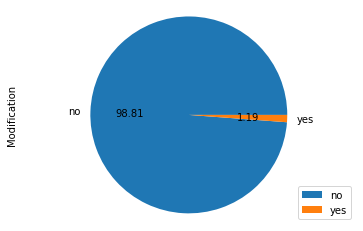

In [51]:
pro['Modification'].value_counts().plot(kind='pie',autopct='%.2f')
plt.axis('equal')
plt.legend(loc='lower right')
plt.show()

In [52]:
pro['Time Differences']=pro['Time Differences'].dt.days

C:\Users\krnjy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



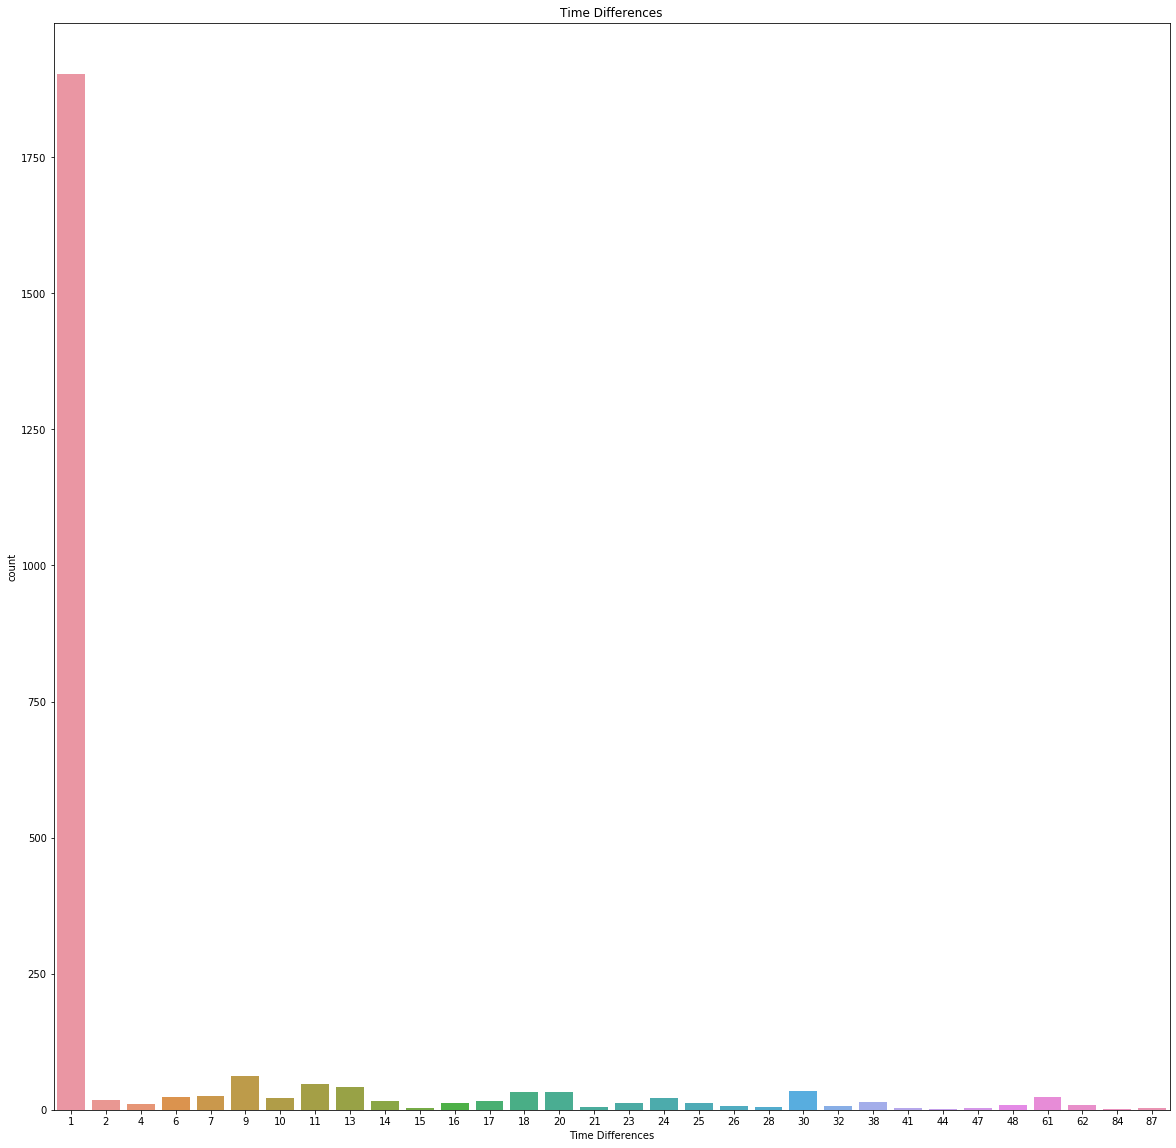

In [53]:
plt.figure(figsize = (20,20))
plt.title('Time Differences')
sns.countplot(x='Time Differences',data=pro)

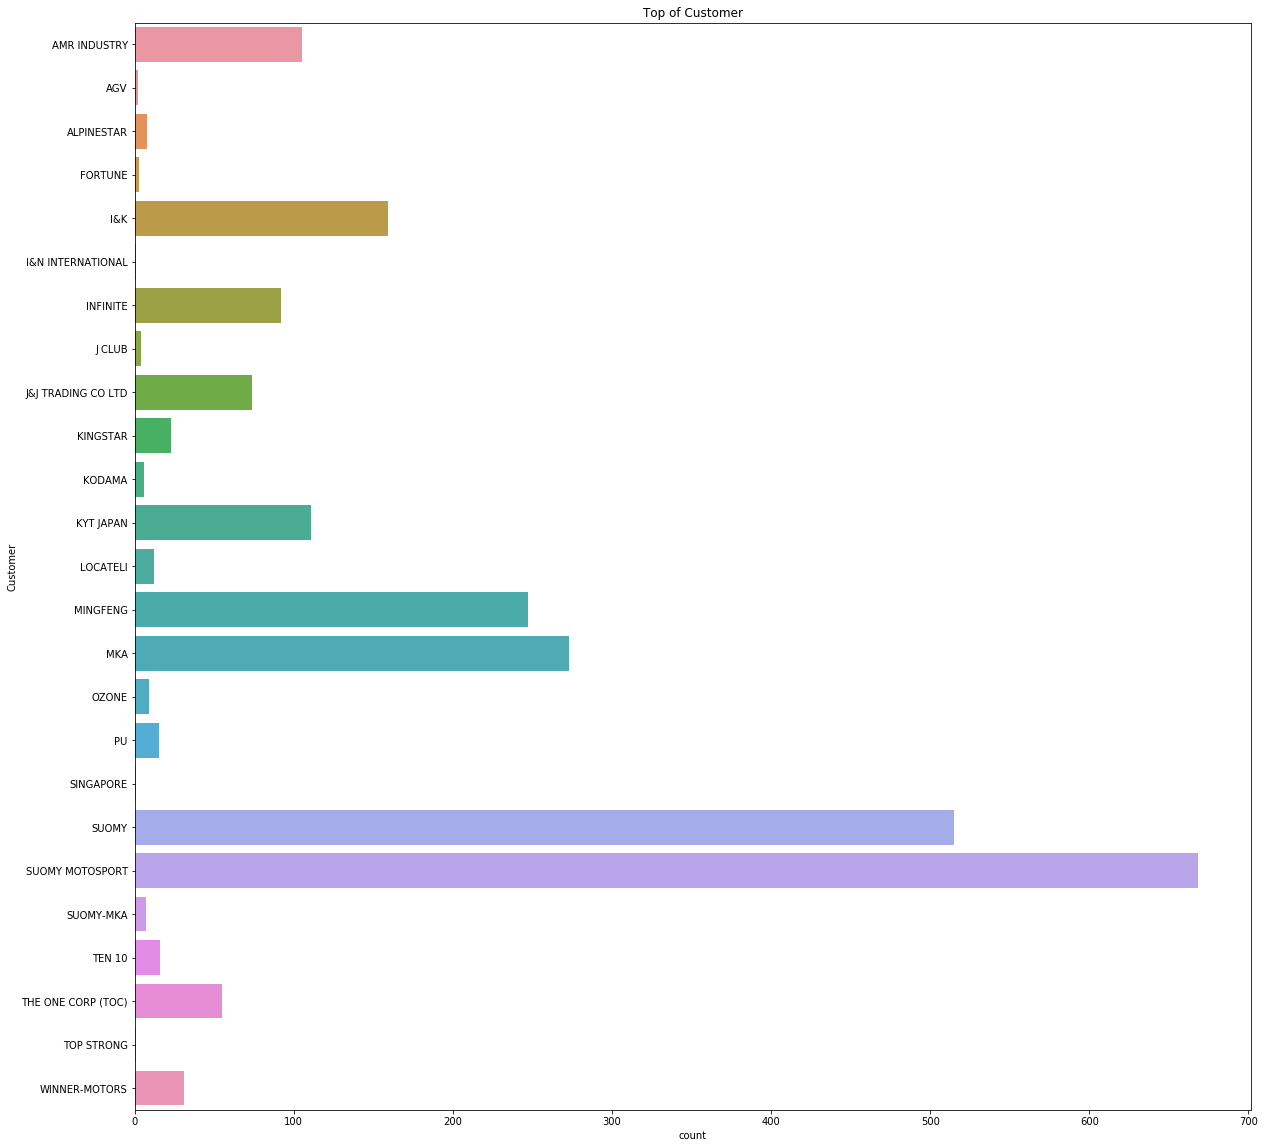

In [54]:
plt.figure(figsize=(20,20))
plt.title('Top of Customer')
sns.countplot(data = pro, y = 'Customer')

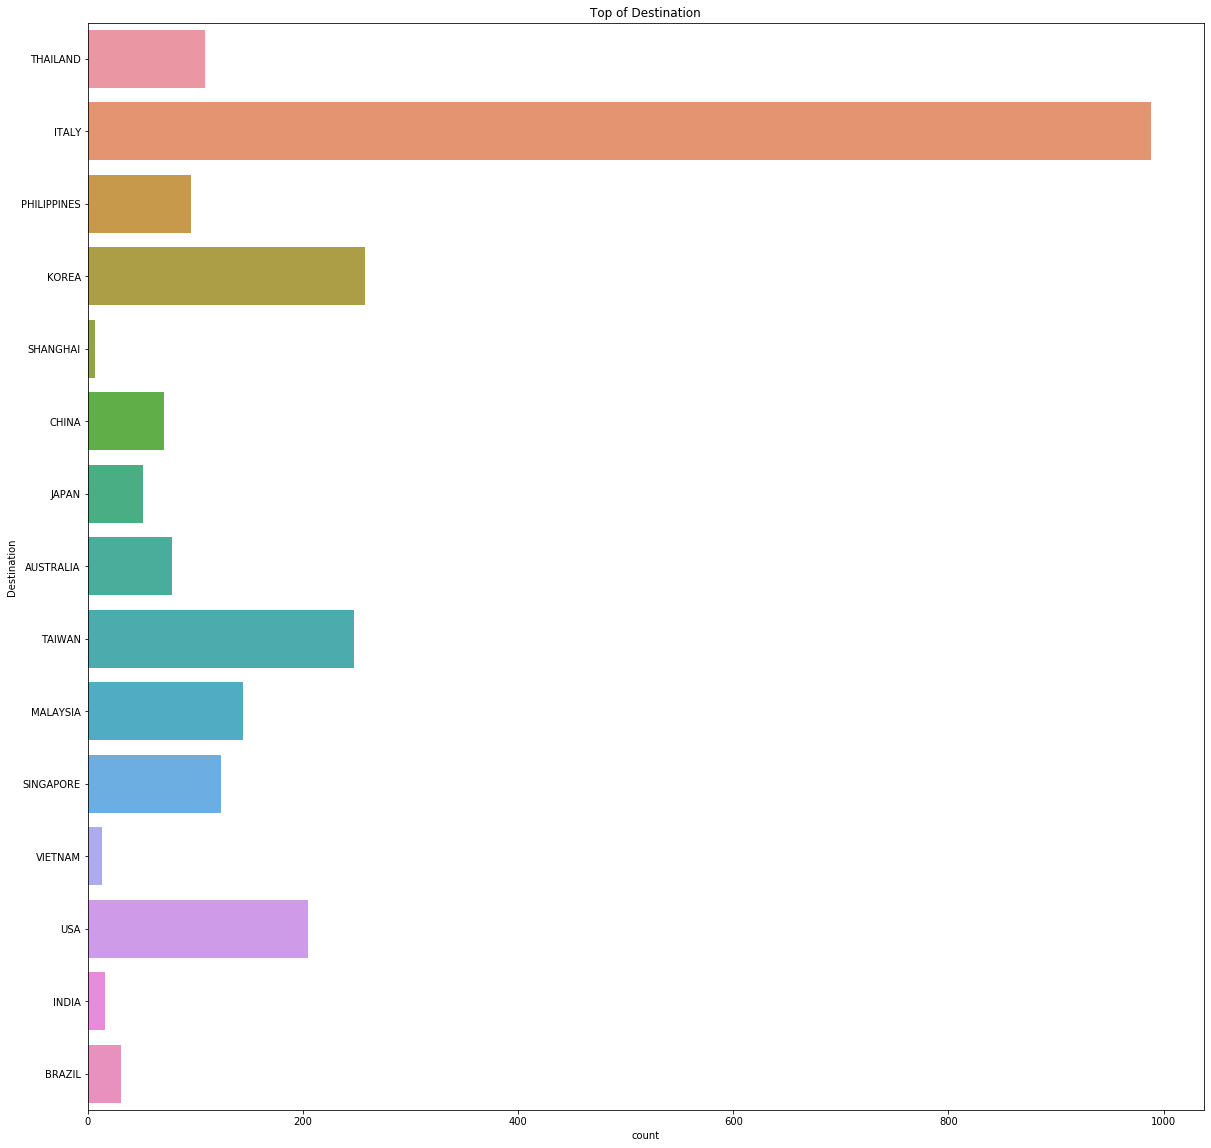

In [55]:
plt.figure(figsize=(20,20))
plt.title('Top of Destination')
sns.countplot(data = pro, y = 'Destination')

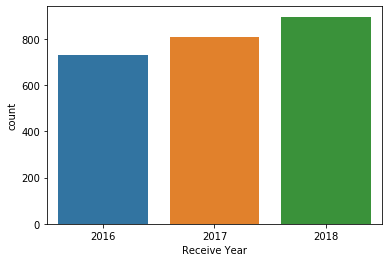

In [56]:
sns.countplot(data = pro, x = 'Receive Year')
plt.show()

In [57]:
pro.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
Time Differences,2438.0,5.174733,10.774778,1.0,1.0,1.0,1.0,87.0
Other,2438.0,92.785890,410.880757,1.0,5.0,10.0,50.0,5000.0
Receive Year,2438.0,2017.068089,0.814492,2016.0,2016.0,2017.0,2018.0,2018.0
Delivery Year,2438.0,2017.079984,0.807079,2016.0,2016.0,2017.0,2018.0,2018.0


In [58]:
pro[pro['Receive Year']==2018].describe()

,Time Differences,Other,Receive Year,Delivery Year
count,897.000000,897.000000,897.0,897.0
mean,6.886288,87.426979,2018.0,2018.0
std,13.700251,435.094455,0.0,0.0
min,1.000000,1.000000,2018.0,2018.0
25%,1.000000,5.000000,2018.0,2018.0
50%,1.000000,10.000000,2018.0,2018.0
75%,1.000000,50.000000,2018.0,2018.0
max,87.000000,5000.000000,2018.0,2018.0


In [59]:
pro[pro['Receive Year']==2017].describe()

,Time Differences,Other,Receive Year,Delivery Year
count,810.000000,810.000000,810.0,810.000000
mean,1.093827,89.918519,2017.0,2017.002469
std,2.206539,330.629105,0.0,0.049660
min,1.000000,1.000000,2017.0,2017.000000
25%,1.000000,5.000000,2017.0,2017.000000
50%,1.000000,15.000000,2017.0,2017.000000
75%,1.000000,50.000000,2017.0,2017.000000
max,62.000000,5000.000000,2017.0,2018.000000


In [60]:
pro[pro['Receive Year']==2016].describe()

,Time Differences,Other,Receive Year,Delivery Year
count,731.000000,731.000000,731.0,731.000000
mean,7.596443,102.538988,2016.0,2016.036936
std,11.128511,458.203947,0.0,0.188733
min,1.000000,1.000000,2016.0,2016.000000
25%,1.000000,5.000000,2016.0,2016.000000
50%,1.000000,15.000000,2016.0,2016.000000
75%,11.000000,30.000000,2016.0,2016.000000
max,84.000000,5000.000000,2016.0,2017.000000
